In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Data Acquisition

In [113]:
# chemin du fichier CSV
csv_path = "./data/data_1_step2.csv"

# lecture du fichier CSV avec pandas
df = pd.read_csv(csv_path)

# affichage des 5 premières lignes
df.head()

,delta_t,ax,ay,az,gx,gy,gz,qw,qx,qy,qz,lin_ax,lin_ay,lin_az
0,1.74,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00
1,0.02,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00
2,0.02,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00
3,0.02,-0.98,-0.1,-0.14,-0.0,0.0,-0.01,0.66,-0.07,0.75,-0.0,0.0,-0.00,-0.01
4,0.02,-0.99,-0.1,-0.14,-0.0,0.0,-0.01,0.66,-0.07,0.75,-0.0,-0.0,-0.01,-0.01


In [114]:
# récupérer les colonnes dans des "arrays" numpy
delta_t = df['delta_t'].to_numpy()
ax = df['ax'].to_numpy()
ay = df['ay'].to_numpy()
az = df['az'].to_numpy()
gx = df['gx'].to_numpy()
gy = df['gy'].to_numpy()
gz = df['gz'].to_numpy()
qw = df['qw'].to_numpy()
qx = df['qx'].to_numpy()
qy = df['qy'].to_numpy()
qz = df['qz'].to_numpy()
lin_ax = df['lin_ax'].to_numpy()
lin_ay = df['lin_ay'].to_numpy()
lin_az = df['lin_az'].to_numpy()

# enlever la force de gravité des données d'accélération z
az -= 1.0

# passage de g en m/s² pour les données d'accélération
ax *= 9.81
ay *= 9.81
az *= 9.81
lin_ax *= 9.81
lin_ay *= 9.81
lin_az *= 9.81


max = len(ax)
acc = [ax, ay, az]
gyro = [gx, gy, gz]
quat = [qw, qx, qy, qz]
lin_acc = [lin_ax, lin_ay, lin_az]

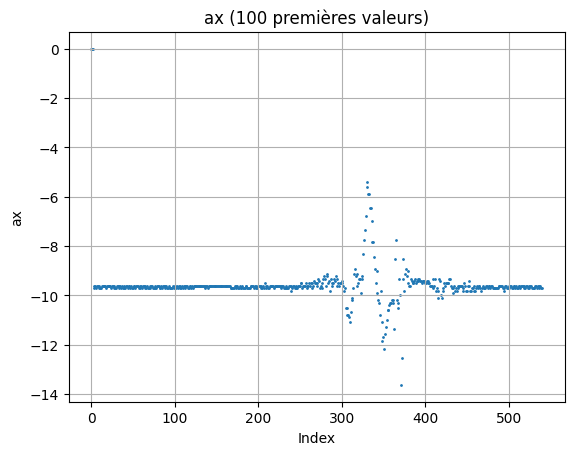

In [115]:
buffer_size = 100

plt.scatter(range(len(ax)), ax, marker='o', s=1)
plt.xlabel('Index')
plt.ylabel('ax')
plt.title(f'ax ({buffer_size} premières valeurs)')
plt.grid(True)
plt.show()

# Plot and Scatter fnc

In [116]:
import matplotlib.pyplot as plt

def draw_data(ax, x, start=0, end=None, label='x', title=None, marker='o', size=1, kind='scatter'):
    """
    Scatter plot x over time in a given axis.
    
    Parameters:
        ax : matplotlib axis object
        x : numpy array to plot
        start, end : interval of indices
        label : y-axis label
        title : subplot title
        marker : style of points
        size : size of points
    """
    if end is None:
        end = len(x)
    
    if kind == 'scatter':
        ax.scatter(range(end-start), x[start:end], marker=marker, s=size)
    elif kind == 'plot':
        ax.plot(range(end-start), x[start:end])
    else:
        raise ValueError("kind doit être 'scatter' ou 'plot'")
    
    ax.set_ylabel(label)
    if title is None:
        title = f'{label} ({end-start} valeurs)'
    ax.set_title(title)
    ax.grid(True)

def draw_data1(x, start=0, end=None, label='x', title=None, marker='o', size=1, kind='plot'):
    fig, ax = plt.subplots(figsize=(8, 4))
    draw_data(ax, x, start=start, end=end, label=label, title=title, marker=marker, size=size, kind=kind)
    ax.set_xlabel('Index')
    plt.tight_layout()
    plt.show()

def draw_data2(x,y, start=0, end=None, label_x='x', label_y='y', size=1, kind='plot'):
    fig, axes = plt.subplots(2, 1, figsize=(15, 6))
    draw_data(axes[0], x, start=start, end=end, label=label_x, size=size, kind=kind)
    draw_data(axes[1], y, start=start, end=end, label=label_y, size=size, kind=kind)
    axes[1].set_xlabel('Index')
    plt.tight_layout()
    plt.show()

def draw_data3(x,y,z, start=0, end=None, label_x='x', label_y='y', label_z='z', size=1, kind='plot'):
    fig, axes = plt.subplots(3, 1, figsize=(15, 9))
    draw_data(axes[0], x, start=start, end=end, label=label_x, size=size, kind=kind)
    draw_data(axes[1], y, start=start, end=end, label=label_y, size=size, kind=kind)
    draw_data(axes[2], z, start=start, end=end, label=label_z, size=size, kind=kind)
    axes[2].set_xlabel('Index')
    plt.tight_layout()
    plt.show()

def draw_data4(w,x,y,z, start=0, end=None, label_w='w', label_x='x', label_y='y', label_z='z', size=1, kind='plot'):
    fig, axes = plt.subplots(4, 1, figsize=(15, 12))
    draw_data(axes[0], w, start=start, end=end, label=label_w, size=size, kind=kind)
    draw_data(axes[1], x, start=start, end=end, label=label_x, size=size, kind=kind)
    draw_data(axes[2], y, start=start, end=end, label=label_y, size=size, kind=kind)
    draw_data(axes[3], z, start=start, end=end, label=label_z, size=size, kind=kind)
    axes[3].set_xlabel('Index')
    plt.tight_layout()
    plt.show()

In [117]:
def compare_data(x, y, start=0, end=None, xlabel='x', ylabel='y', title=None, marker='o', size=1, kind='plot'):
    """
    Plot y versus x for a given interval.
    
    Parameters:
        x, y : numpy arrays to plot
        start : index de début (inclus)
        end : index de fin (exclus), None pour la fin du tableau
        xlabel, ylabel : labels des axes
        title : titre du graphique, None pour générer automatiquement
        marker : style des points
    """
    if end is None:
        end = len(x)

    plt.figure(figsize=(15, 10))

    if kind == 'plot':
        plt.plot(x[start:end], y[start:end], marker=marker)
    elif kind == 'scatter':
        plt.scatter(x[start:end], y[start:end], marker=marker, s=size)
    else:
        raise ValueError(f"Unknown kind: {kind}")

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    if title is None:
        title = f'{ylabel} en fonction de {xlabel} ({end-start} valeurs)'
    plt.title(title)
    
    plt.grid(True)
    plt.show()

# Acc/lin_acc et gyr/quaternion comparasions

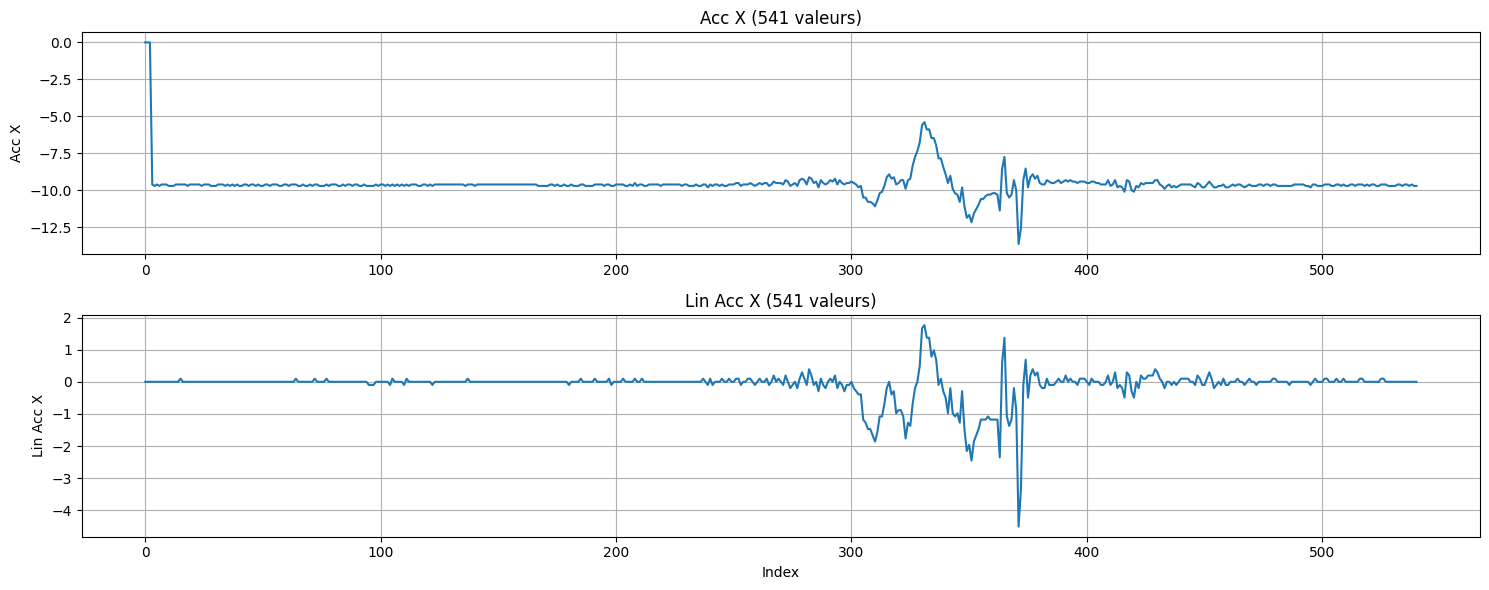

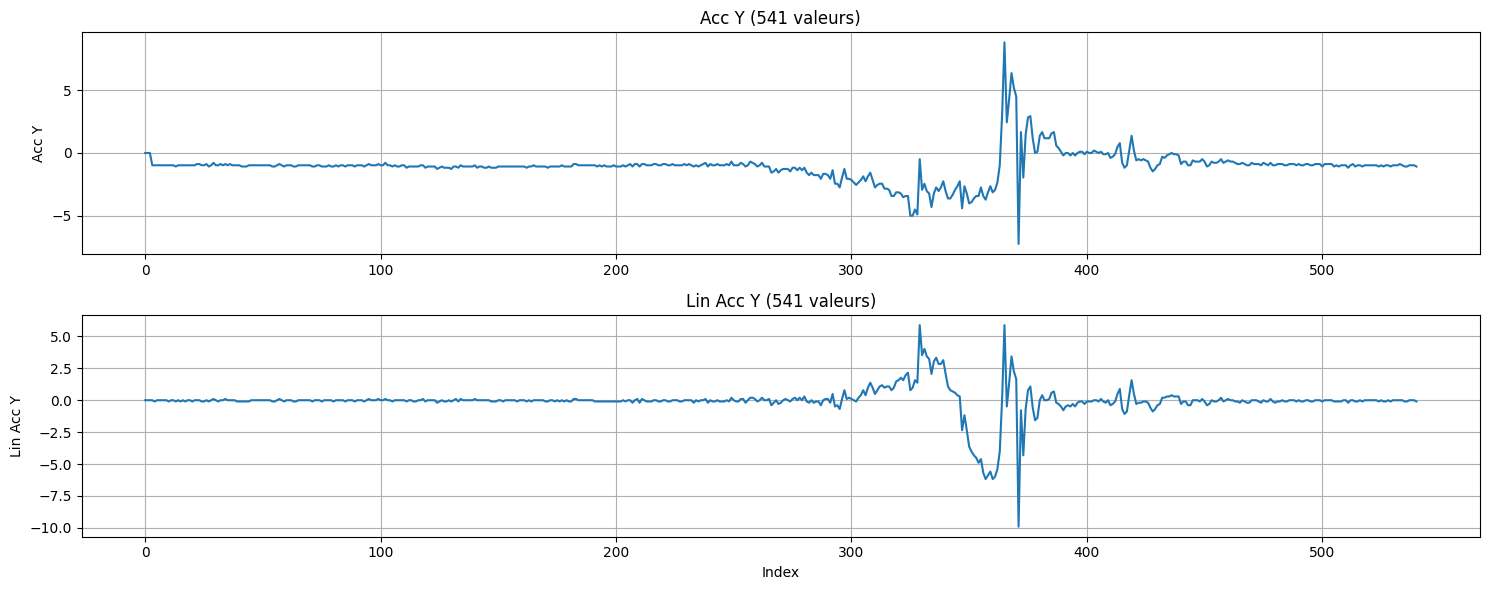

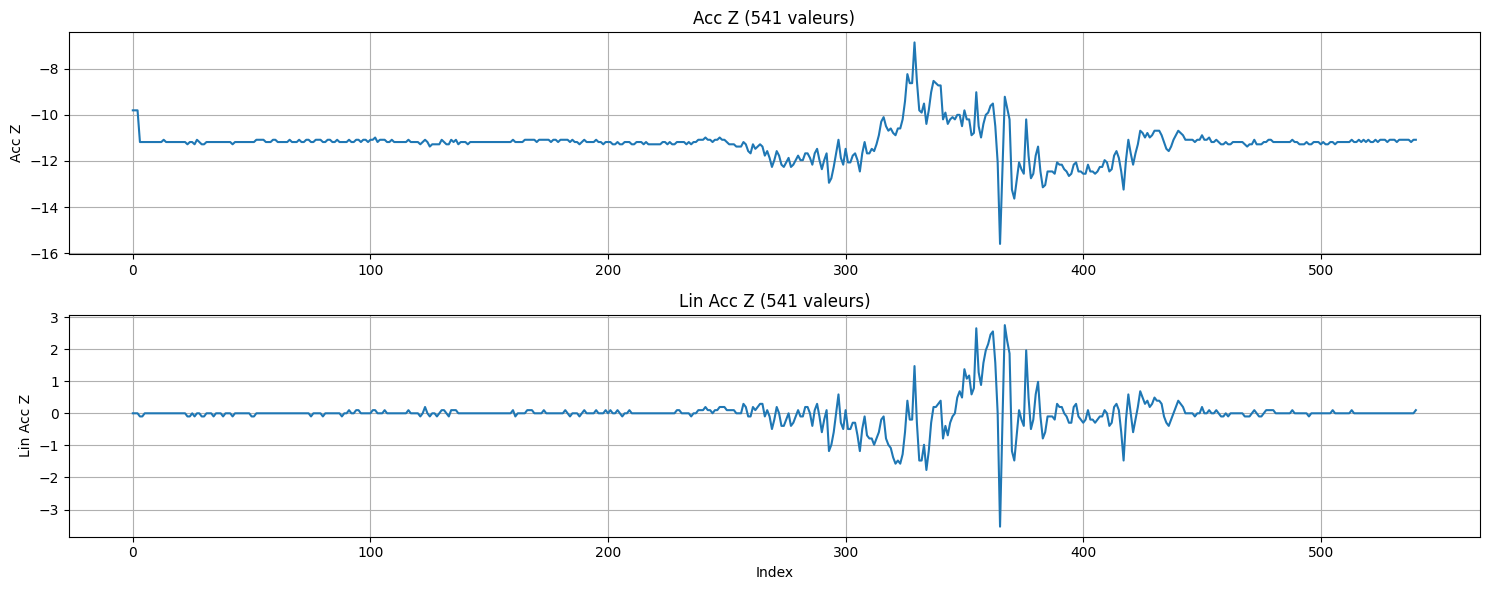

In [118]:
draw_data2(ax, lin_ax, label_x='Acc X', label_y='Lin Acc X')
draw_data2(ay, lin_ay, label_x='Acc Y', label_y='Lin Acc Y')
draw_data2(az, lin_az, label_x='Acc Z', label_y='Lin Acc Z')

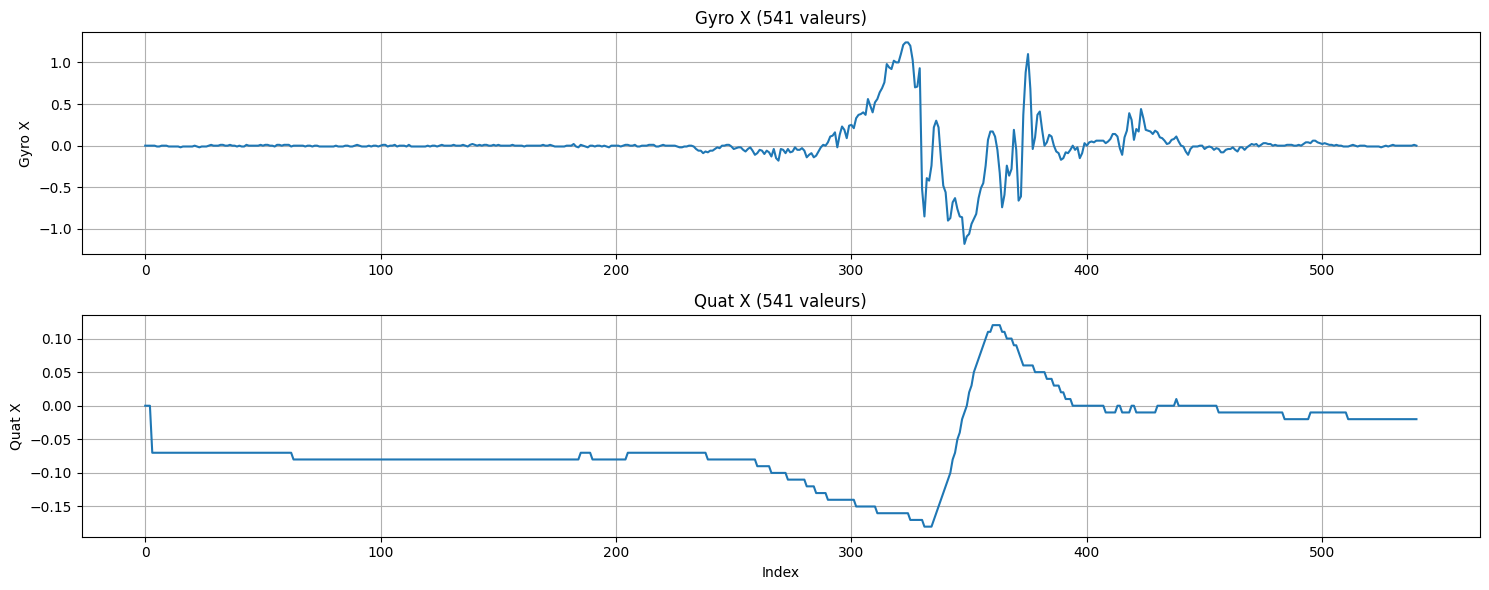

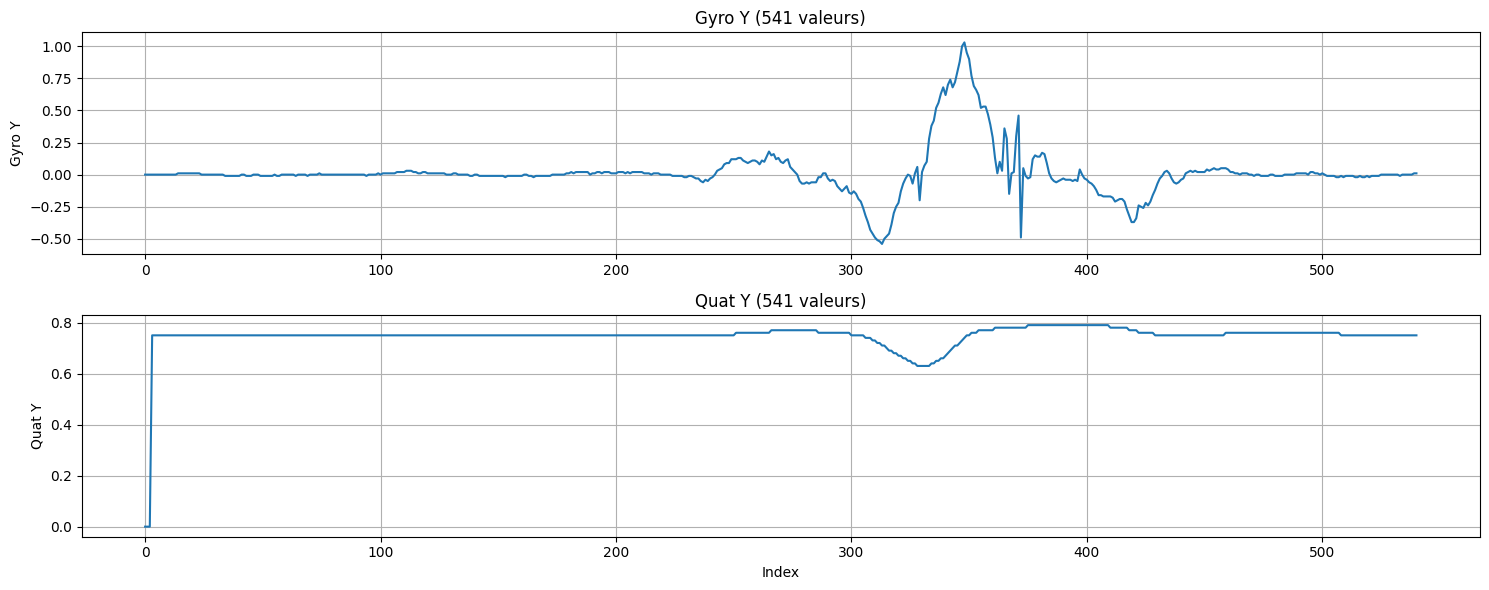

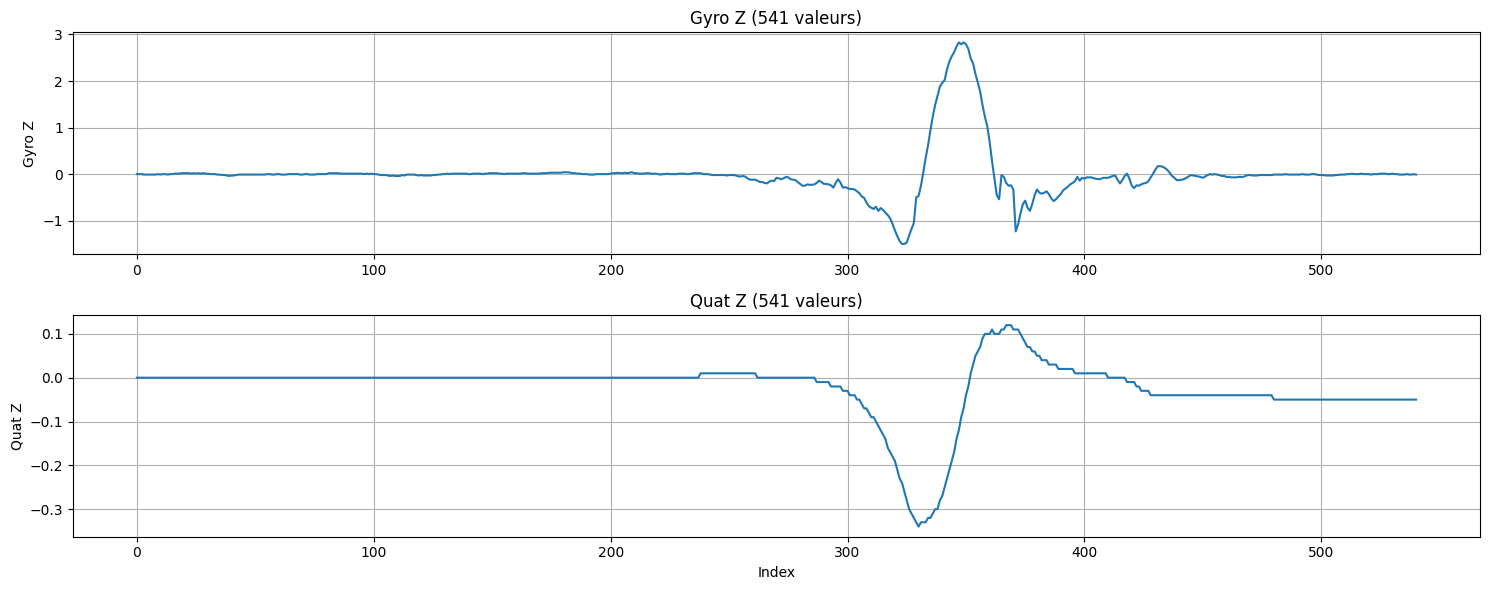

In [119]:
draw_data2(gx, qx, label_x='Gyro X', label_y='Quat X')
draw_data2(gy, qy, label_x='Gyro Y', label_y='Quat Y')
draw_data2(gz, qz, label_x='Gyro Z', label_y='Quat Z')

# Integration fncs

In [120]:
def trapezoidal_integration(data_x, data_y, data_z, delta_t):
    """
    Integrate 3D data using trapezoidal rule.
    
    Parameters:
        data_x, data_y, data_z : numpy arrays of values to integrate
        delta_t : numpy array of time steps (same length as data arrays)
    
    Returns:
        integrated : numpy array of shape (N, 3) with integrated values for x, y, z
    """
    N = len(data_x)
    integrated = np.zeros((N, 3))
    
    for i in range(1, N):
        integrated[i, 0] = integrated[i-1, 0] + 0.5 * (data_x[i] + data_x[i-1]) * delta_t[i]
        integrated[i, 1] = integrated[i-1, 1] + 0.5 * (data_y[i] + data_y[i-1]) * delta_t[i]
        integrated[i, 2] = integrated[i-1, 2] + 0.5 * (data_z[i] + data_z[i-1]) * delta_t[i]

    return integrated


In [121]:
def euler_integration(data_x, data_y, data_z, delta_t):
    """
    Integrate 3D data using simple Euler method.
    
    Parameters:
        data_x, data_y, data_z : numpy arrays of values to integrate
        delta_t : numpy array of time steps (same length as data arrays)
    
    Returns:
        integrated : numpy array of shape (N, 3) with integrated values for x, y, z
    """
    N = len(data_x)
    integrated = np.zeros((N, 3))
    
    for i in range(1, N):
        dt = delta_t[i]
        integrated[i, 0] = integrated[i-1, 0] + data_x[i-1] * dt
        integrated[i, 1] = integrated[i-1, 1] + data_y[i-1] * dt
        integrated[i, 2] = integrated[i-1, 2] + data_z[i-1] * dt
    
    return integrated

# Velocity calculations

In [122]:
vx, vy, vz = trapezoidal_integration(ax, ay, az, delta_t).T
lin_vx, lin_vy, lin_vz = trapezoidal_integration(lin_ax, lin_ay, lin_az, delta_t).T

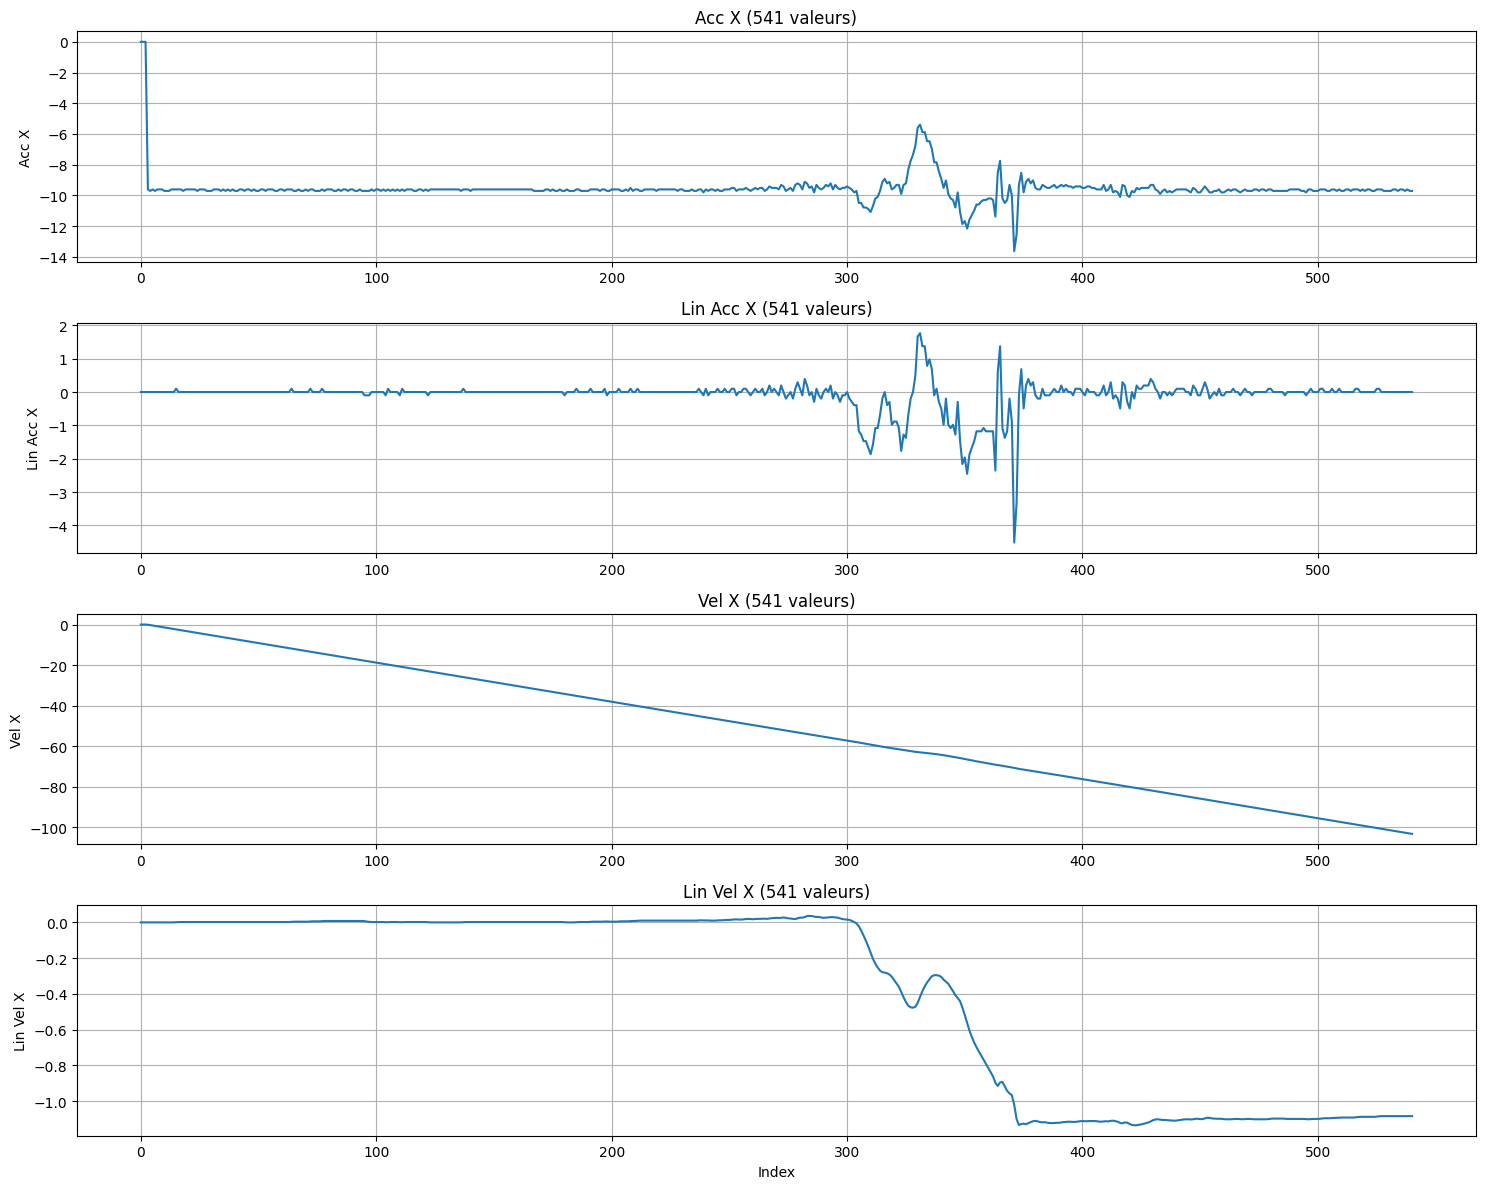

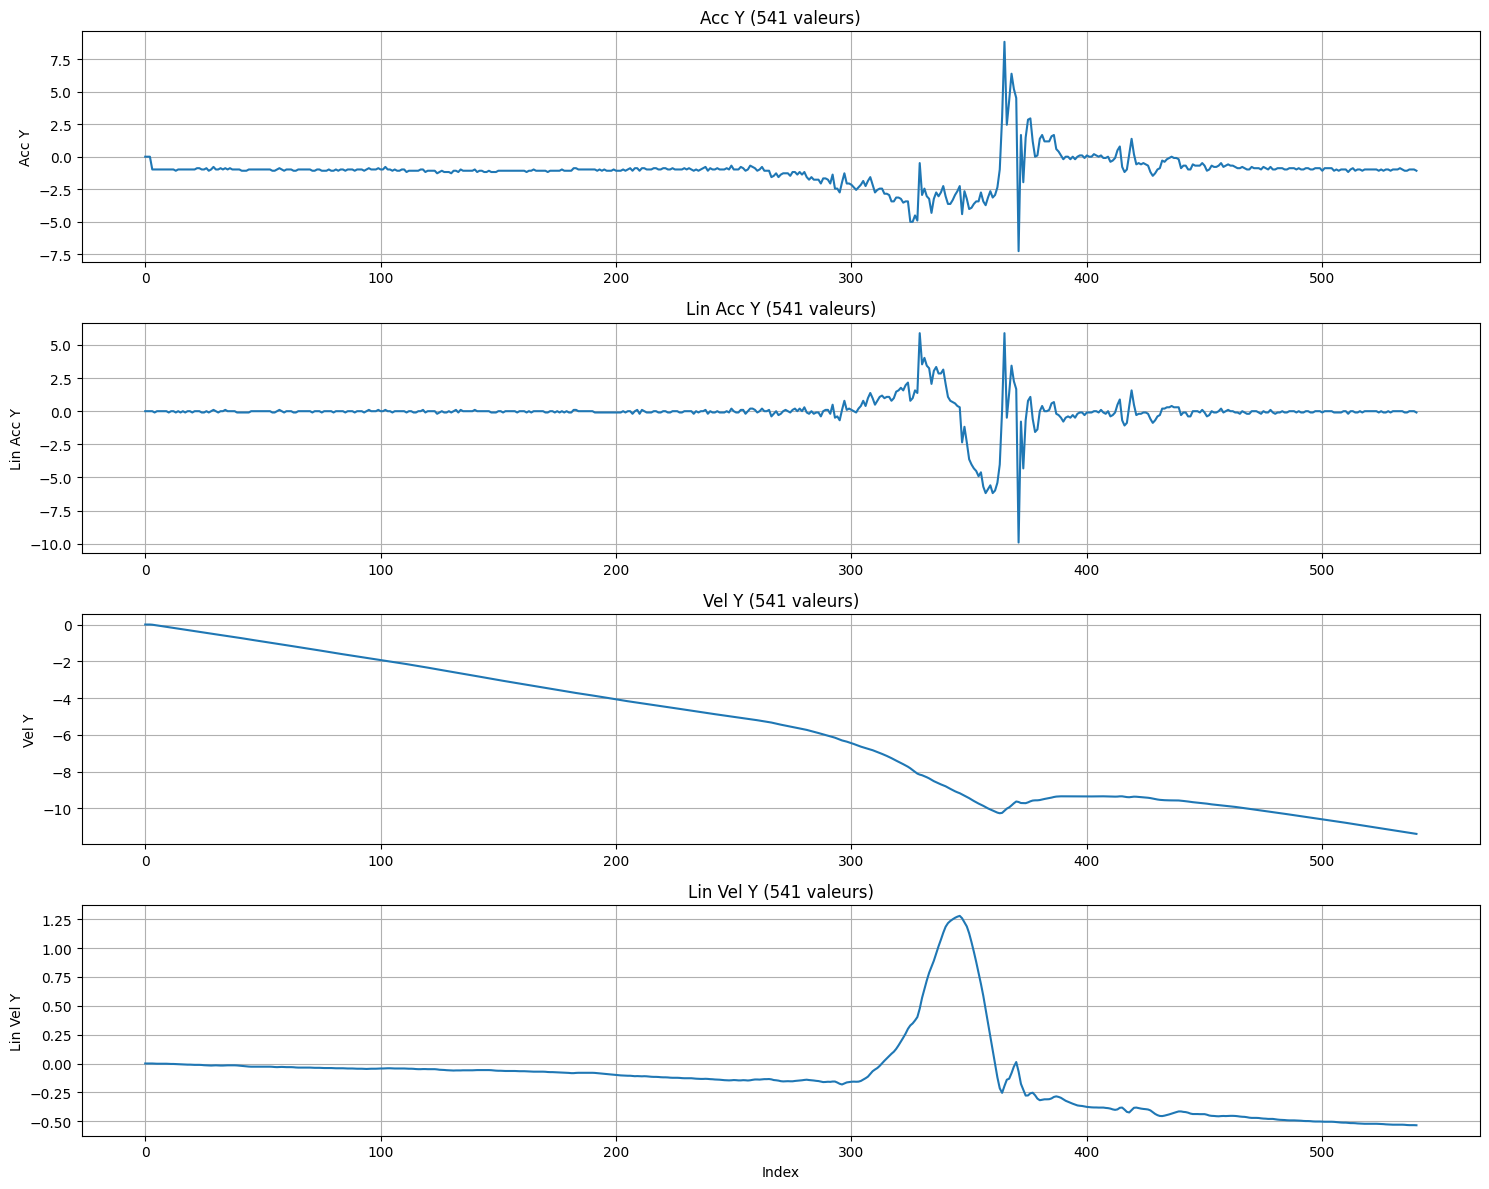

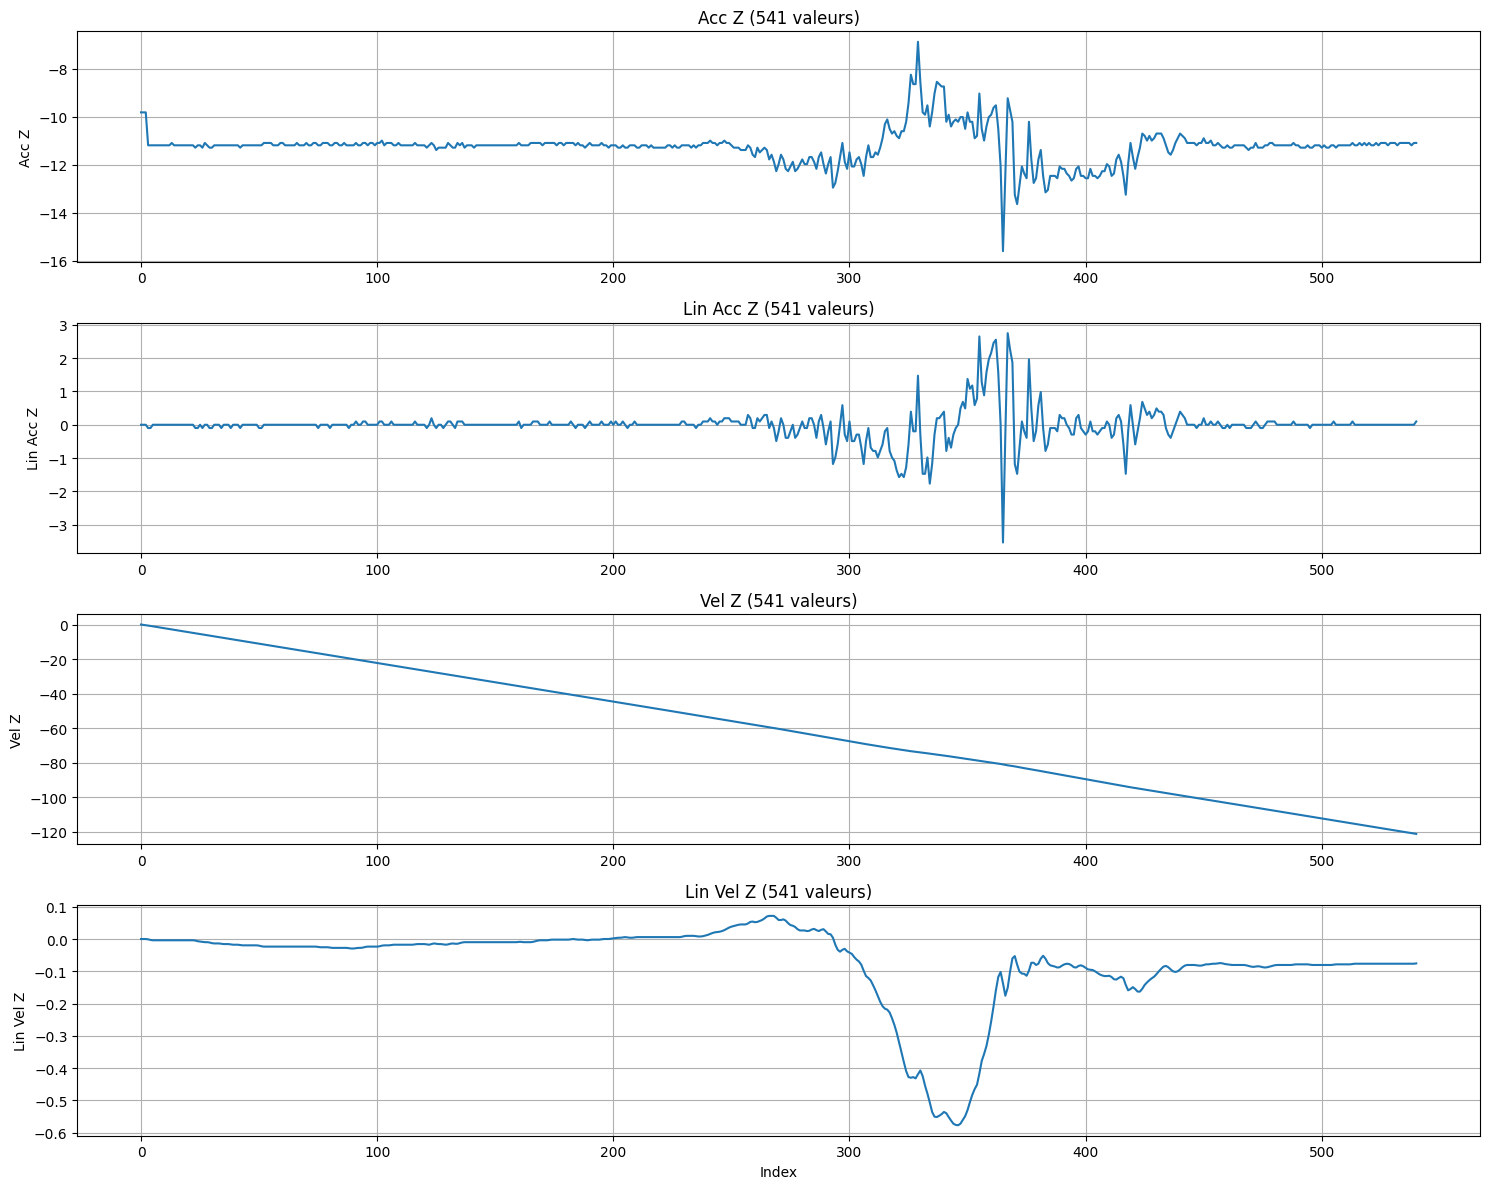

In [124]:

draw_data4(ax, lin_ax, vx, lin_vx, label_w='Acc X', label_x='Lin Acc X', label_y='Vel X', label_z='Lin Vel X')
draw_data4(ay, lin_ay, vy, lin_vy, label_w='Acc Y', label_x='Lin Acc Y', label_y='Vel Y', label_z='Lin Vel Y')
draw_data4(az, lin_az, vz, lin_vz, label_w='Acc Z', label_x='Lin Acc Z', label_y='Vel Z', label_z='Lin Vel Z')

# Positions calculations

In [125]:
def mTocm(x, y, z):
    return x*100, y*100, z*100

In [126]:
px, py, pz = trapezoidal_integration(vx, vy, vz, delta_t).T
lin_px, lin_py, lin_pz = trapezoidal_integration(lin_vx, lin_vy, lin_vz, delta_t).T

# conversion de m en cm
px, py, pz = mTocm(px, py, pz)
lin_px, lin_py, lin_pz = mTocm(lin_px, lin_py, lin_pz)

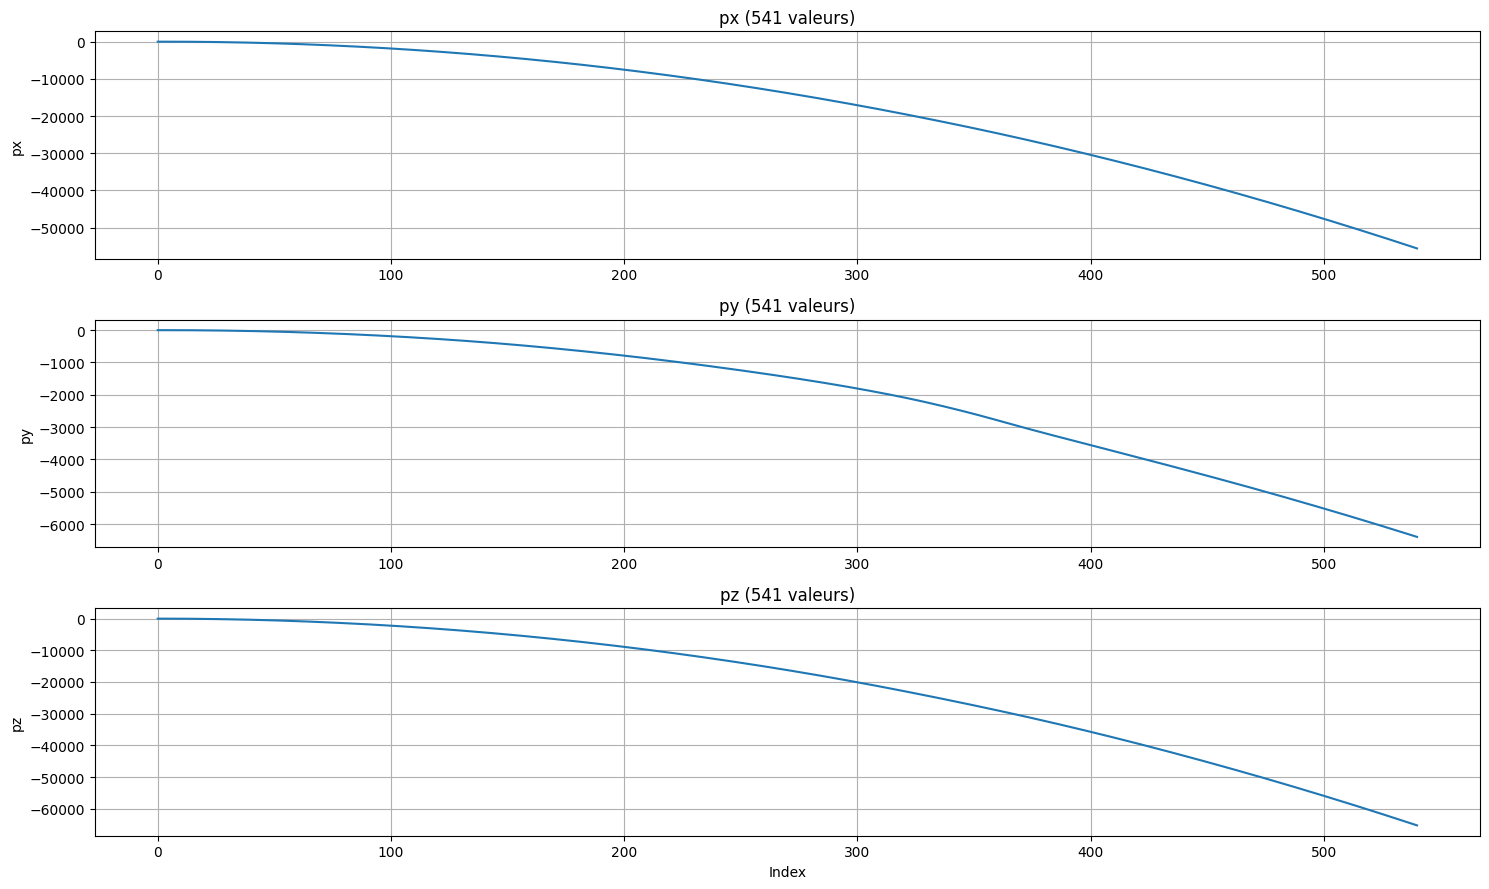

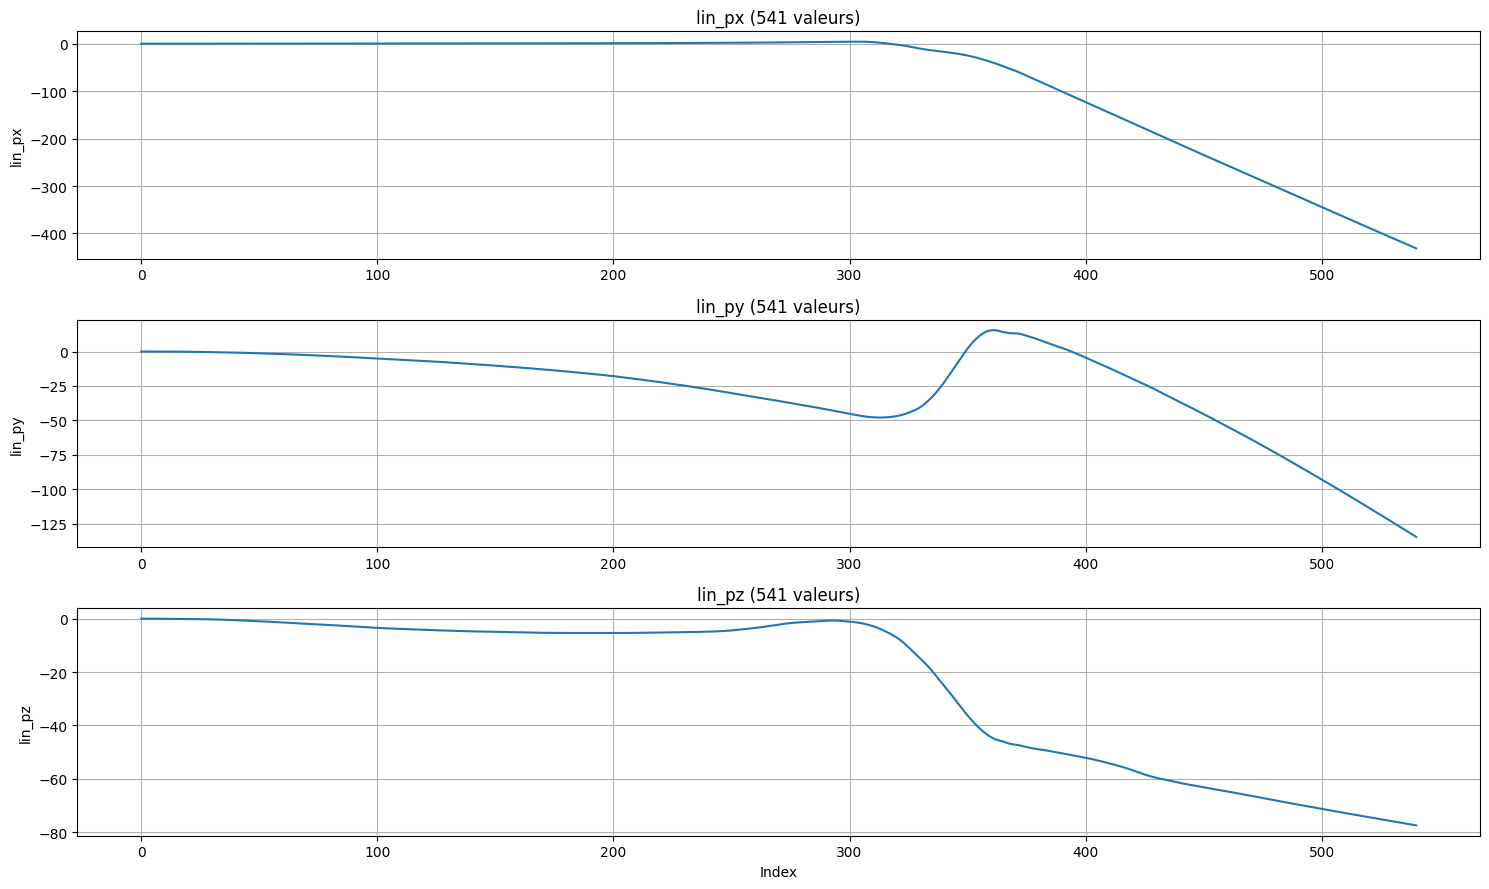

In [127]:
draw_data3(px, py, pz, label_x='px', label_y='py', label_z='pz')
draw_data3(lin_px, lin_py, lin_pz, label_x='lin_px', label_y='lin_py', label_z='lin_pz')

# HP filters

In [35]:
import numpy as np
from scipy.signal import butter, filtfilt

def high_pass_filter_scipy(data_x, data_y, data_z, cutoff, sample_period, order=1):
    """
    Apply a high-pass Butterworth filter on 3D data.
    
    Parameters:
        data_x, data_y, data_z : numpy arrays of input data
        cutoff : cutoff frequency in Hz
        sample_period : time between samples in seconds
        order : filter order (default 1)
    
    Returns:
        filtered_x, filtered_y, filtered_z : filtered numpy arrays
    """
    fs = 1 / sample_period  # sampling frequency
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    
    filtered_x = filtfilt(b, a, data_x)
    filtered_y = filtfilt(b, a, data_y)
    filtered_z = filtfilt(b, a, data_z)
    
    return filtered_x, filtered_y, filtered_z


In [36]:
import numpy as np

def high_pass_filter_iir(x, y, z, alpha):
    """
    Simple high-pass filter for 3D data, using difference equation
    like it can be done on Nicla Sense ME.
    
    Parameters:
        x, y, z : numpy arrays of input data
        alpha : filter coefficient between 0 and 1 (smaller = plus de filtrage)
    
    Returns:
        x_hp, y_hp, z_hp : filtered arrays
    """
    x_hp = np.zeros_like(x)
    y_hp = np.zeros_like(y)
    z_hp = np.zeros_like(z)
    
    for i in range(1, len(x)):
        x_hp[i] = alpha * (x_hp[i-1] + x[i] - x[i-1])
        y_hp[i] = alpha * (y_hp[i-1] + y[i] - y[i-1])
        z_hp[i] = alpha * (z_hp[i-1] + z[i] - z[i-1])
    
    return x_hp, y_hp, z_hp



# v and pos calculations 

In [41]:
hp_coeff = 0.1

In [96]:
hpiv_vx, hpiv_vy, hpiv_vz = high_pass_filter_iir(lin_vx, lin_vy, lin_vz, alpha=hp_coeff)
hpiv_px, hpiv_py, hpiv_pz = trapezoidal_integration(hpiv_vx, hpiv_vy, hpiv_vz, delta_t).T
hpip_hpiv_px, hpip_hpiv_py, hpip_hpiv_pz = high_pass_filter_iir(hpiv_px, hpiv_py, hpiv_pz, alpha=hp_coeff)

# m to cm
hpiv_px, hpiv_py, hpiv_pz = mTocm(hpiv_px, hpiv_py, hpiv_pz)
hpip_hpiv_px, hpip_hpiv_py, hpip_hpiv_pz = mTocm(hpip_hpiv_px, hpip_hpiv_py, hpip_hpiv_pz)

In [97]:
hpsv_vx, hpsv_vy, hpsv_vz = high_pass_filter_scipy(lin_vx, lin_vy, lin_vz, cutoff=hp_coeff, sample_period=np.mean(delta_t), order=1)
hpsv_px, hpsv_py, hpsv_pz = trapezoidal_integration(hpsv_vx, hpsv_vy, hpsv_vz, delta_t).T
hpsp_hpsv_px, hpsp_hpsv_py, hpsp_hpsv_pz = high_pass_filter_scipy(hpsv_px, hpsv_py, hpsv_pz, cutoff=hp_coeff, sample_period=np.mean(delta_t), order=1)

# m to cm
hpsv_px, hpsv_py, hpsv_pz = mTocm(hpsv_px, hpsv_py, hpsv_pz)
hpsp_hpsv_px, hpsp_hpsv_py, hpsp_hpsv_pz = mTocm(hpsp_hpsv_px, hpsp_hpsv_py, hpsp_hpsv_pz)

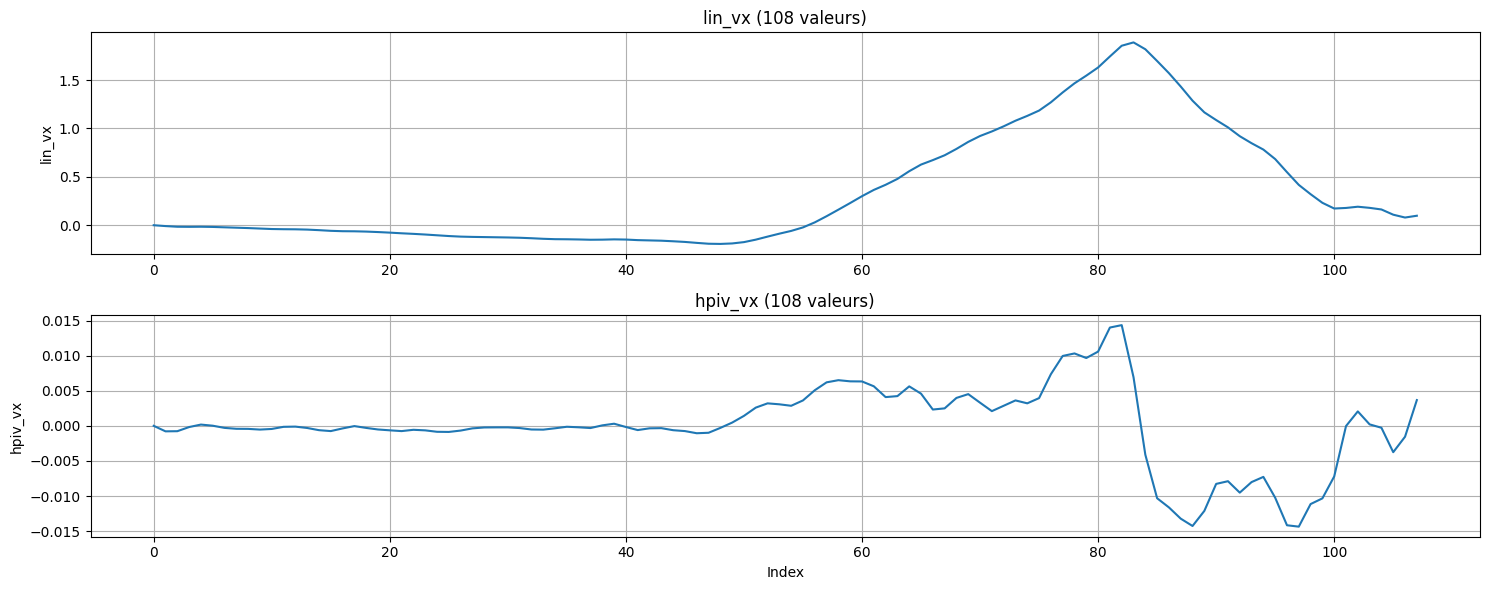

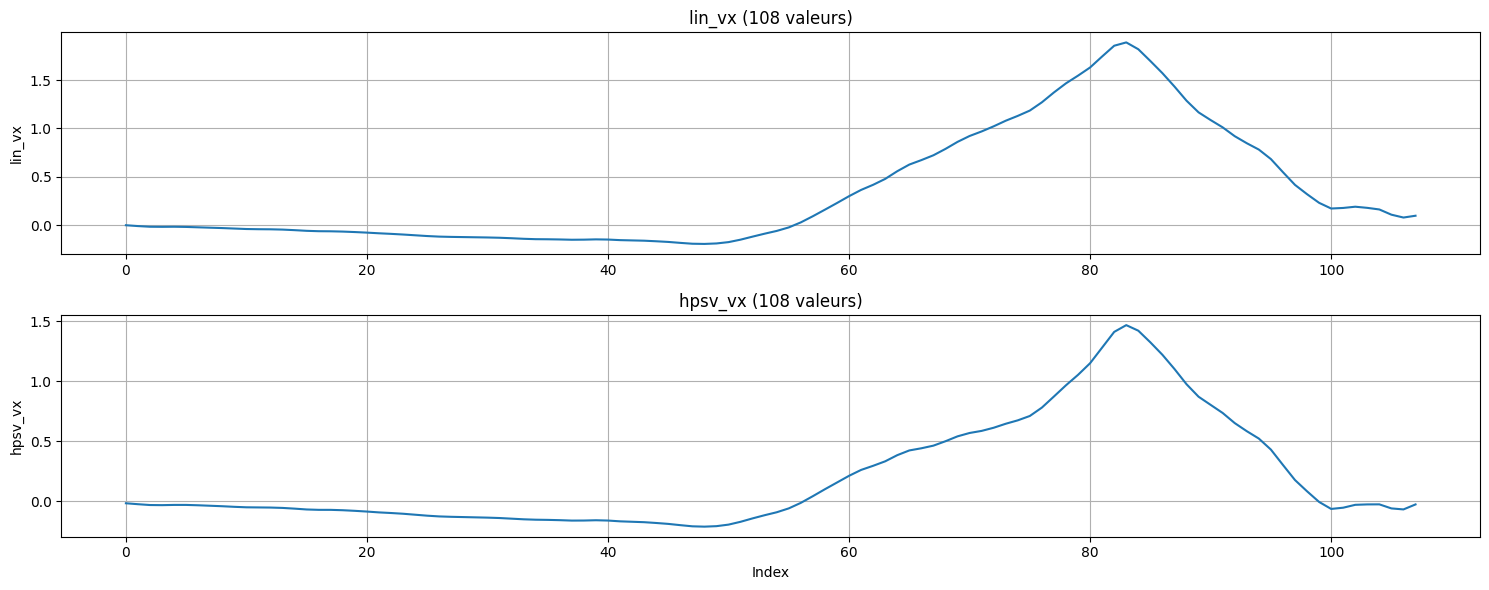

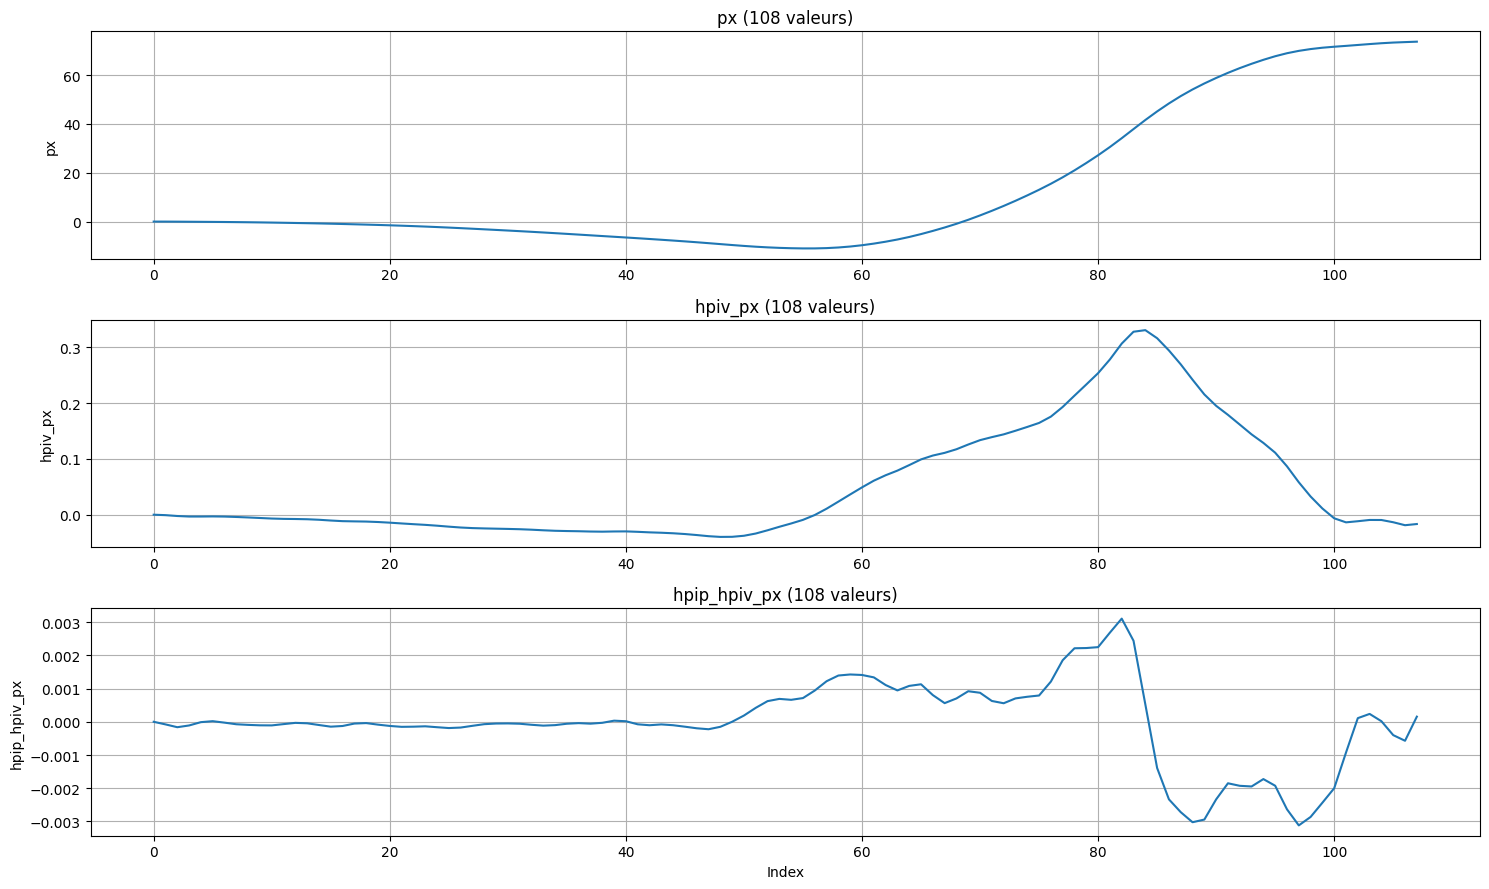

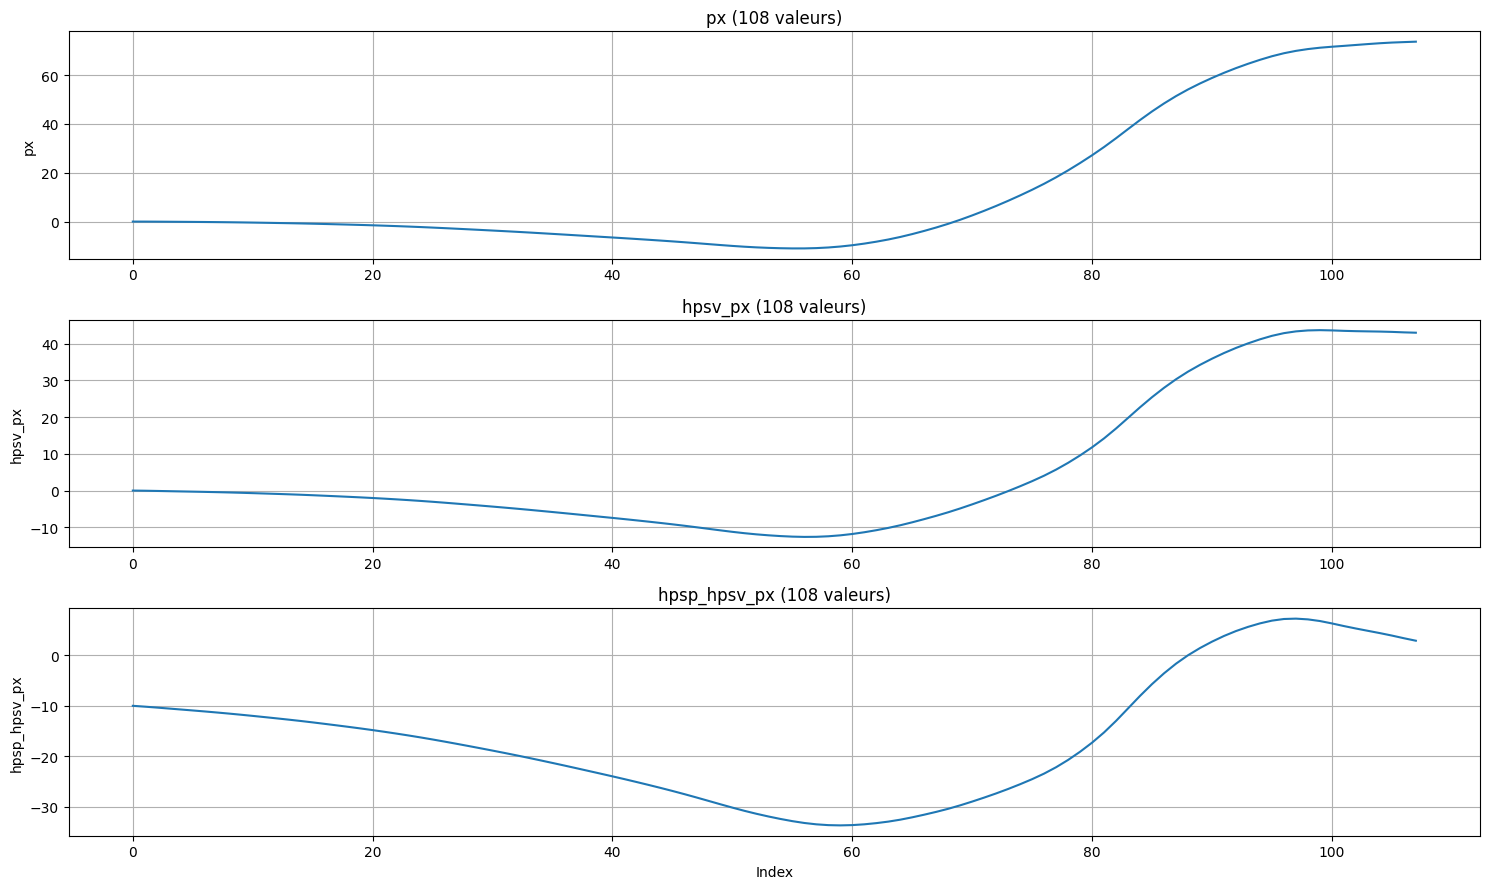

In [98]:
draw_data2(vx, hpiv_vx, label_x='lin_vx', label_y='hpiv_vx')
draw_data2(vx, hpsv_vx, label_x='lin_vx', label_y='hpsv_vx')
draw_data3(px, hpiv_px, hpip_hpiv_px, label_x='px', label_y='hpiv_px', label_z='hpip_hpiv_px')
draw_data3(px, hpsv_px, hpsp_hpsv_px, label_x='px', label_y='hpsv_px', label_z='hpsp_hpsv_px')

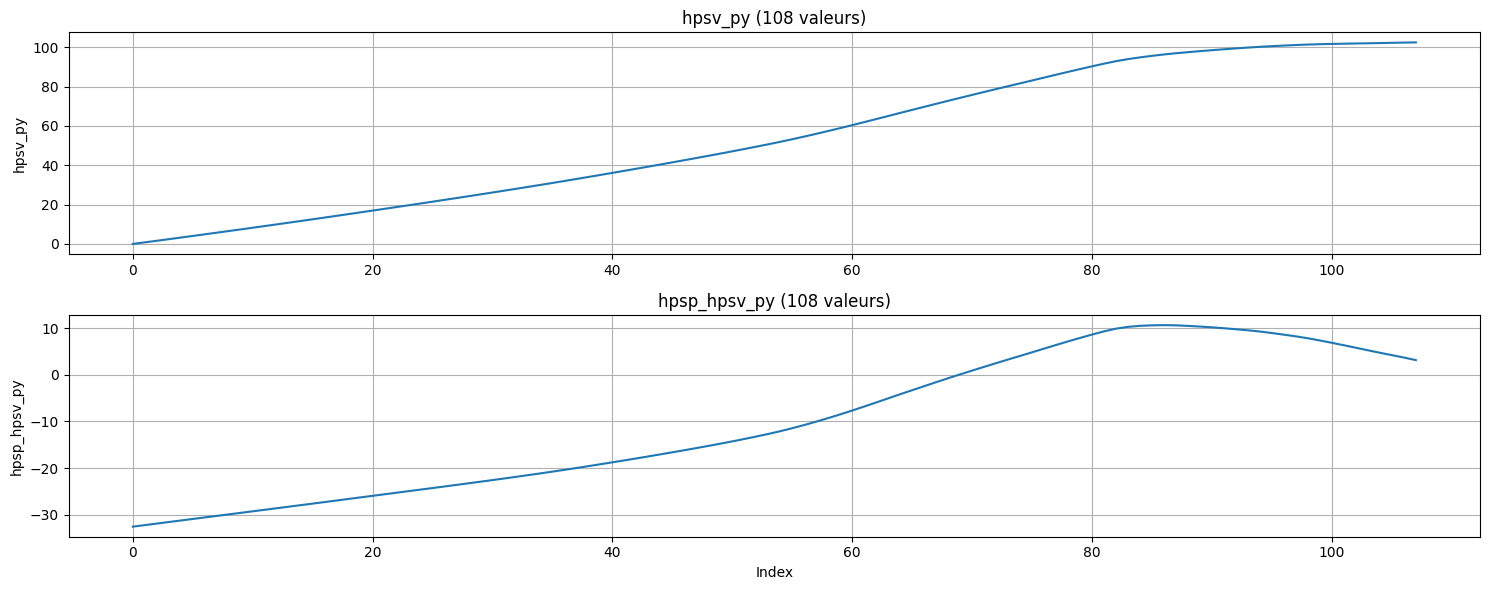

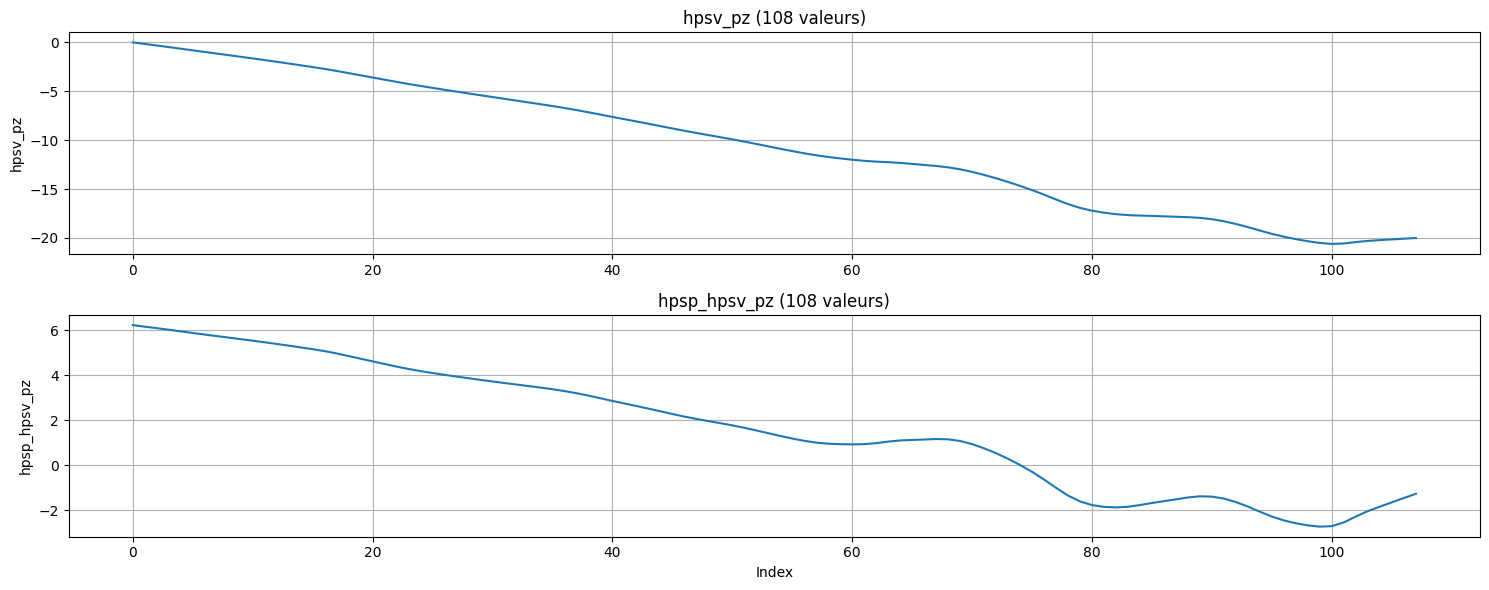

In [99]:
draw_data2(hpsv_py, hpsp_hpsv_py, label_x='hpsv_py', label_y='hpsp_hpsv_py')
draw_data2(hpsv_pz, hpsp_hpsv_pz, label_x='hpsv_pz', label_y='hpsp_hpsv_pz')

In [63]:
# There is still one pb : the filters change bcp the scale of the signal after each filtering

# Scaling

In [100]:
max_av_filtre = 0.5926464424671217
max_ap_filtre = 0.05609531673899043
scale = max_av_filtre/max_ap_filtre
print("scale:", scale)
max_final = max_ap_filtre*scale
print("max_final:", max_final)

scale: 10.564989680416373
max_final: 0.5926464424671217


In [101]:
def putToScale(x, x_hp):
    scale_x = np.max(np.abs(x)) / np.max(np.abs(x_hp))
    return x_hp*scale_x

In [104]:
# testing scaling for iir filter
hpiv_vx, hpiv_vy, hpiv_vz = high_pass_filter_iir(lin_vx, lin_vy, lin_vz, alpha=hp_coeff)
shpiv_vx, shpiv_vy, shpiv_vz = putToScale(lin_vx, hpiv_vx), putToScale(lin_vy, hpiv_vy), putToScale(lin_vz, hpiv_vz)
shpiv_px, shpiv_py, shpiv_pz = trapezoidal_integration(shpiv_vx, shpiv_vy, shpiv_vz, delta_t).T
hpip_shpiv_px, hpip_shpiv_py, hpip_shpiv_pz = high_pass_filter_iir(shpiv_px, shpiv_py, shpiv_pz, alpha=hp_coeff)
shpip_shpiv_px, shpip_shpiv_py, shpip_shpiv_pz = putToScale(shpiv_px, hpip_shpiv_px), putToScale(shpiv_py, hpip_shpiv_py), putToScale(shpiv_pz, hpip_shpiv_pz)

# m to cm
shpip_px, shpip_py, shpip_pz = mTocm(shpip_shpiv_px, shpip_shpiv_py, shpip_shpiv_pz)
hpip_shpip_px, hpip_shpip_py, hpip_shpip_pz = mTocm(hpip_shpiv_px, hpip_shpiv_py, hpip_shpiv_pz)
shpip_shpiv_px, shpip_shpiv_py, shpip_shpiv_pz = mTocm(shpip_shpiv_px, shpip_shpiv_py, shpip_shpiv_pz)

#testing scaling for scipy filter
hpsv_vx, hpsv_vy, hpsv_vz = high_pass_filter_scipy(lin_vx, lin_vy, lin_vz, cutoff=hp_coeff, sample_period=np.mean(delta_t), order=1)
shpsv_vx, shpsv_vy, shpsv_vz = putToScale(lin_vx, hpsv_vx), putToScale(lin_vy, hpsv_vy), putToScale(lin_vz, hpsv_vz)
shpsv_px, shpsv_py, shpsv_pz = trapezoidal_integration(shpsv_vx, shpsv_vy, shpsv_vz, delta_t).T
hpsp_shpsv_px, hpsp_shpsv_py, hpsp_shpsv_pz = high_pass_filter_scipy(shpsv_px, shpsv_py, shpsv_pz, cutoff=hp_coeff, sample_period=np.mean(delta_t), order=1)
shpsp_shpsv_px, shpsp_shpsv_py, shpsp_shpsv_pz = putToScale(shpsv_px, hpsp_shpsv_px), putToScale(shpsv_py, hpsp_shpsv_py), putToScale(shpsv_pz, hpsp_shpsv_pz)

# m to cm
shpsv_px, shpsv_py, shpsv_pz = mTocm(shpsv_px, shpsv_py, shpsv_pz)
hpsp_shpsv_px, hpsp_shpsv_py, hpsp_shpsv_pz = mTocm(hpsp_shpsv_px, hpsp_shpsv_py, hpsp_shpsv_pz)
shpsp_shpsv_px, shpsp_shpsv_py, shpsp_shpsv_pz = mTocm(shpsp_shpsv_px, shpsp_shpsv_py, shpsp_shpsv_pz)

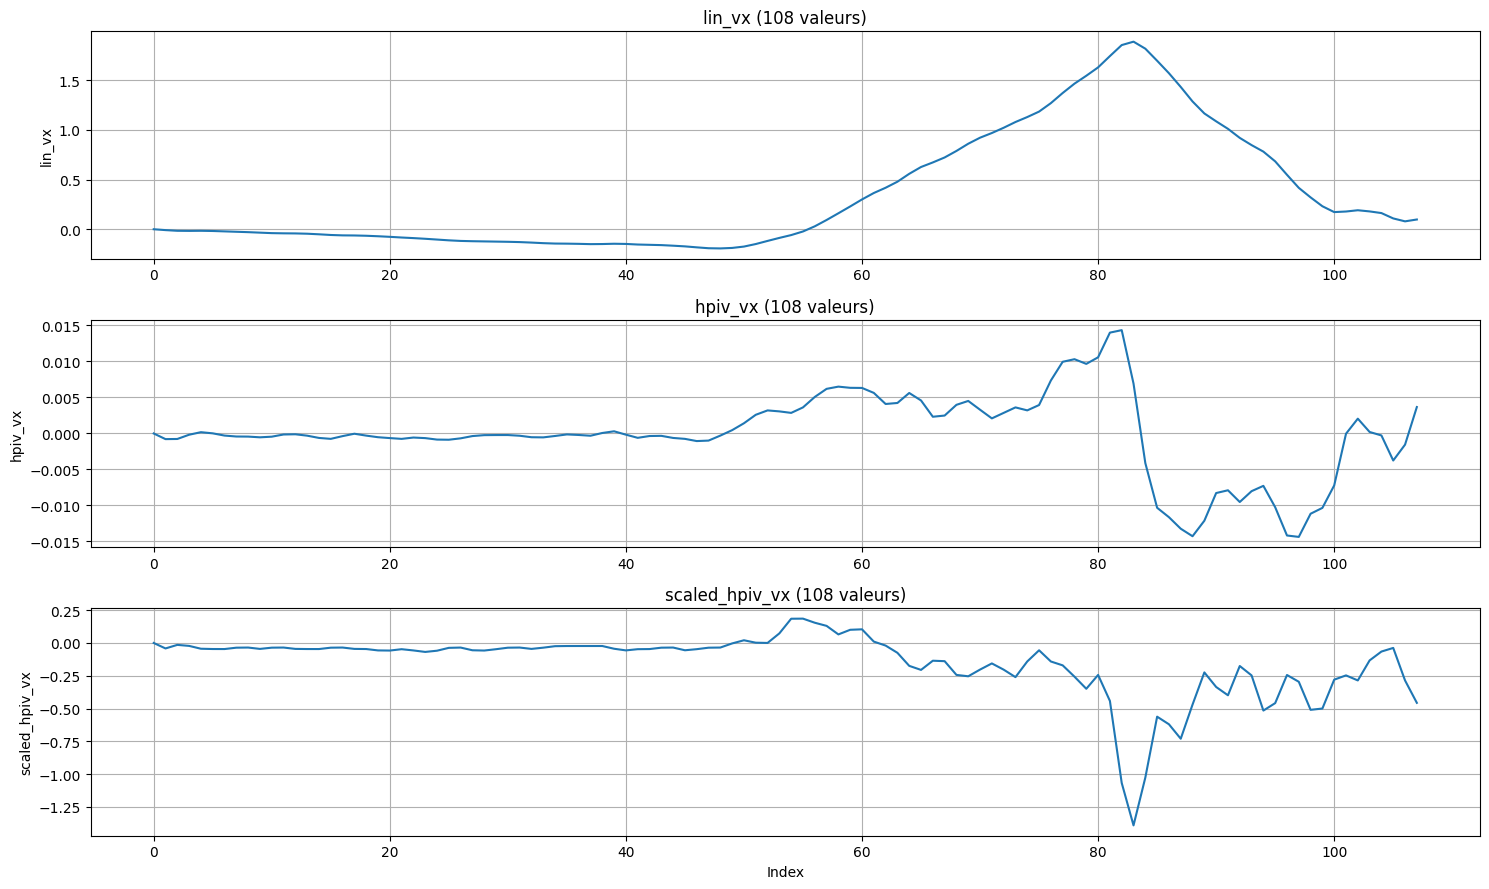

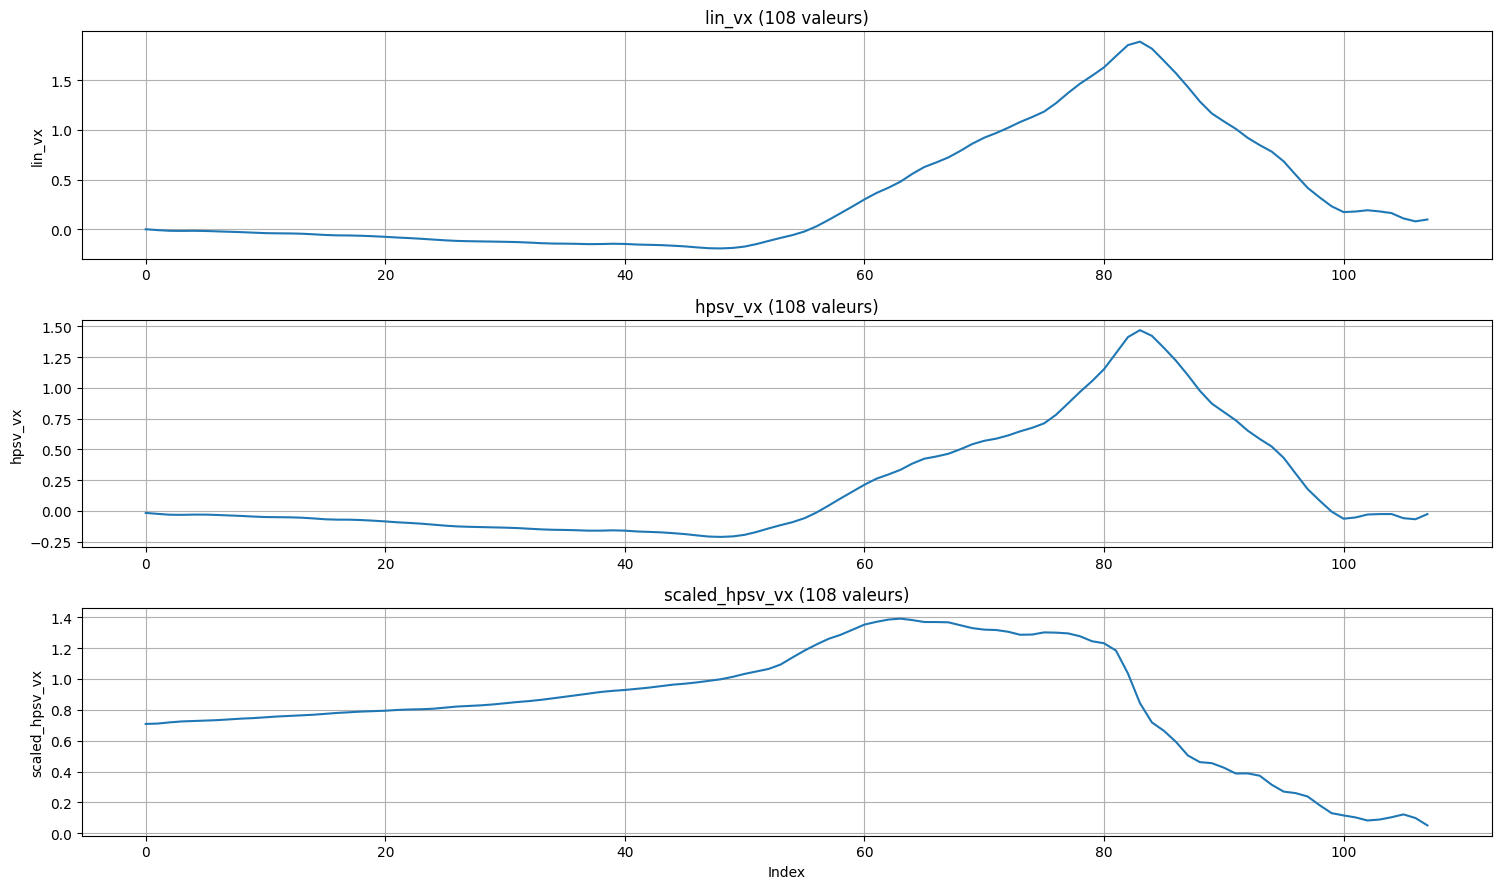

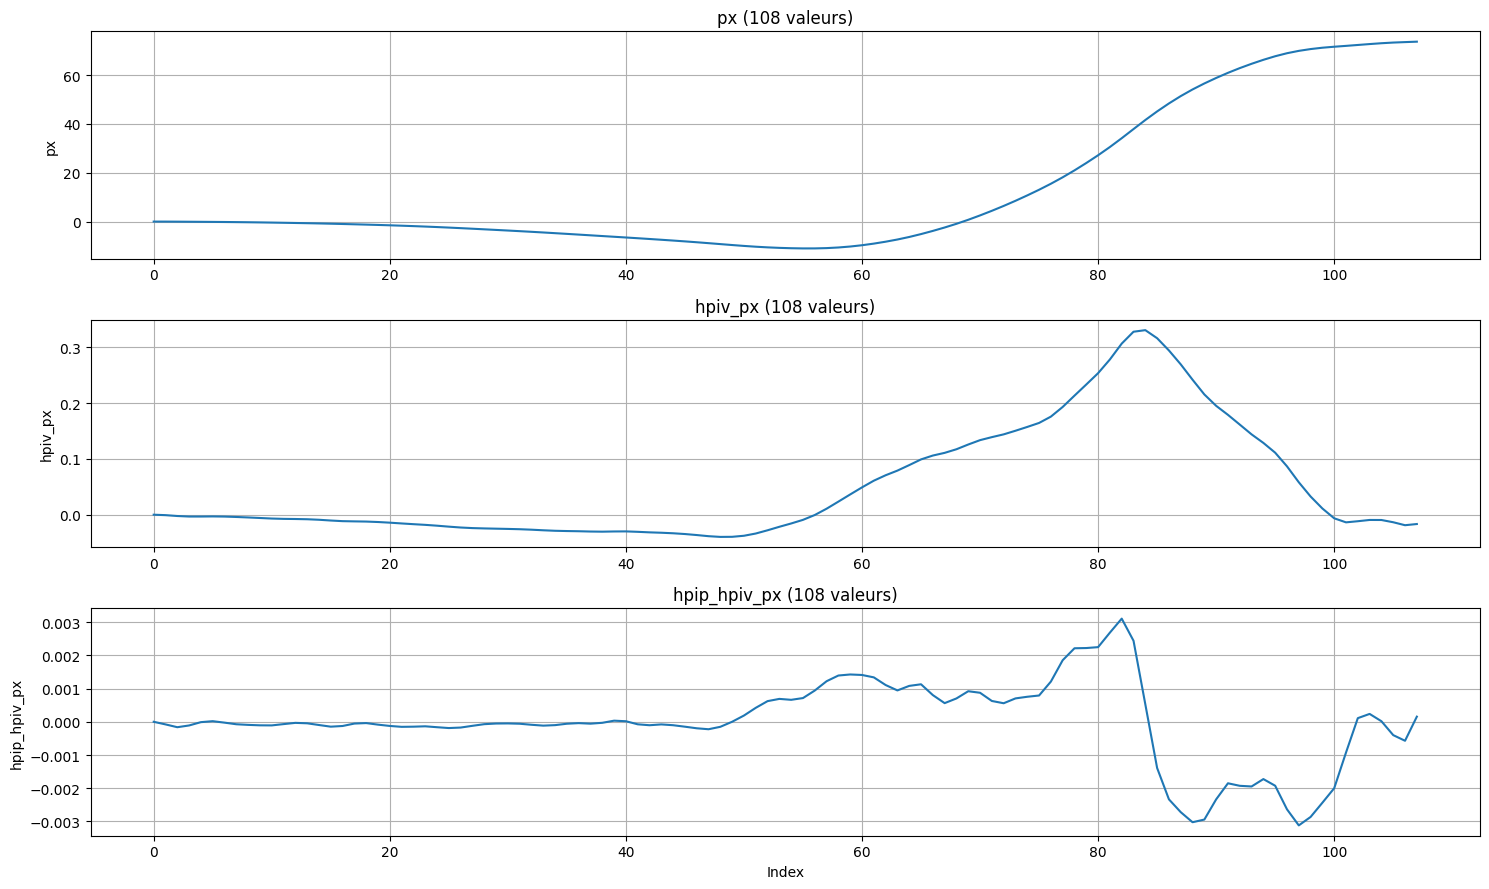

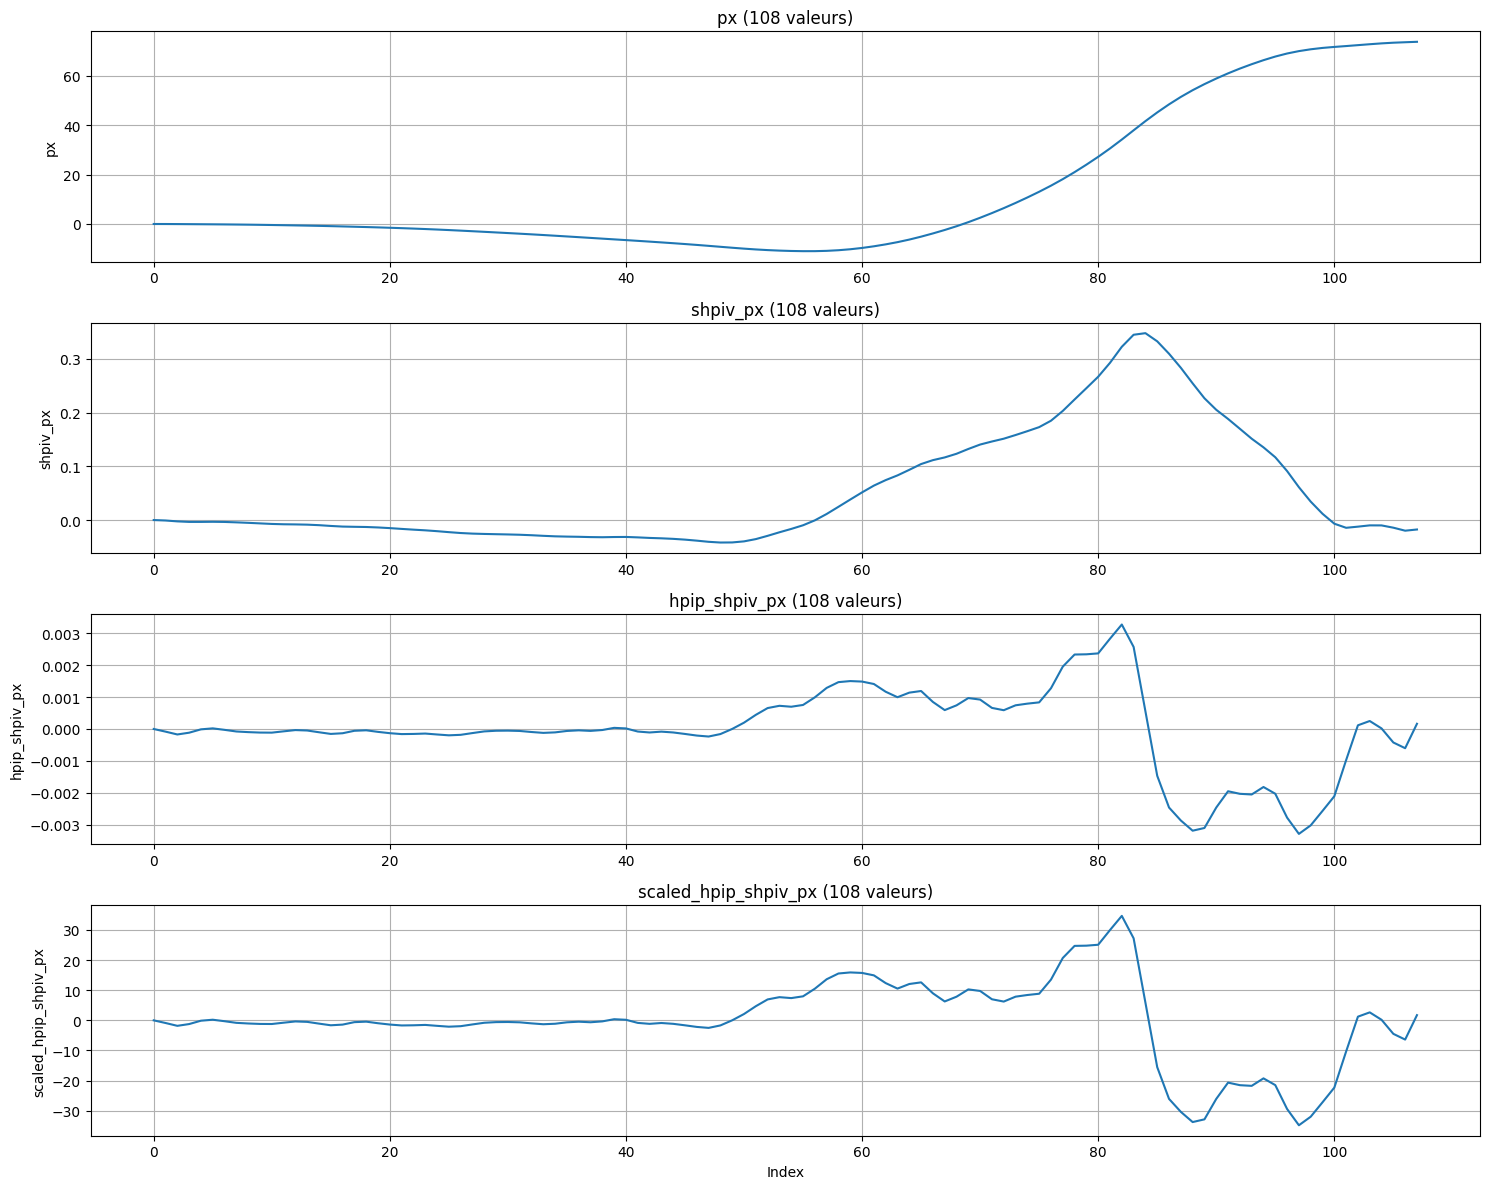

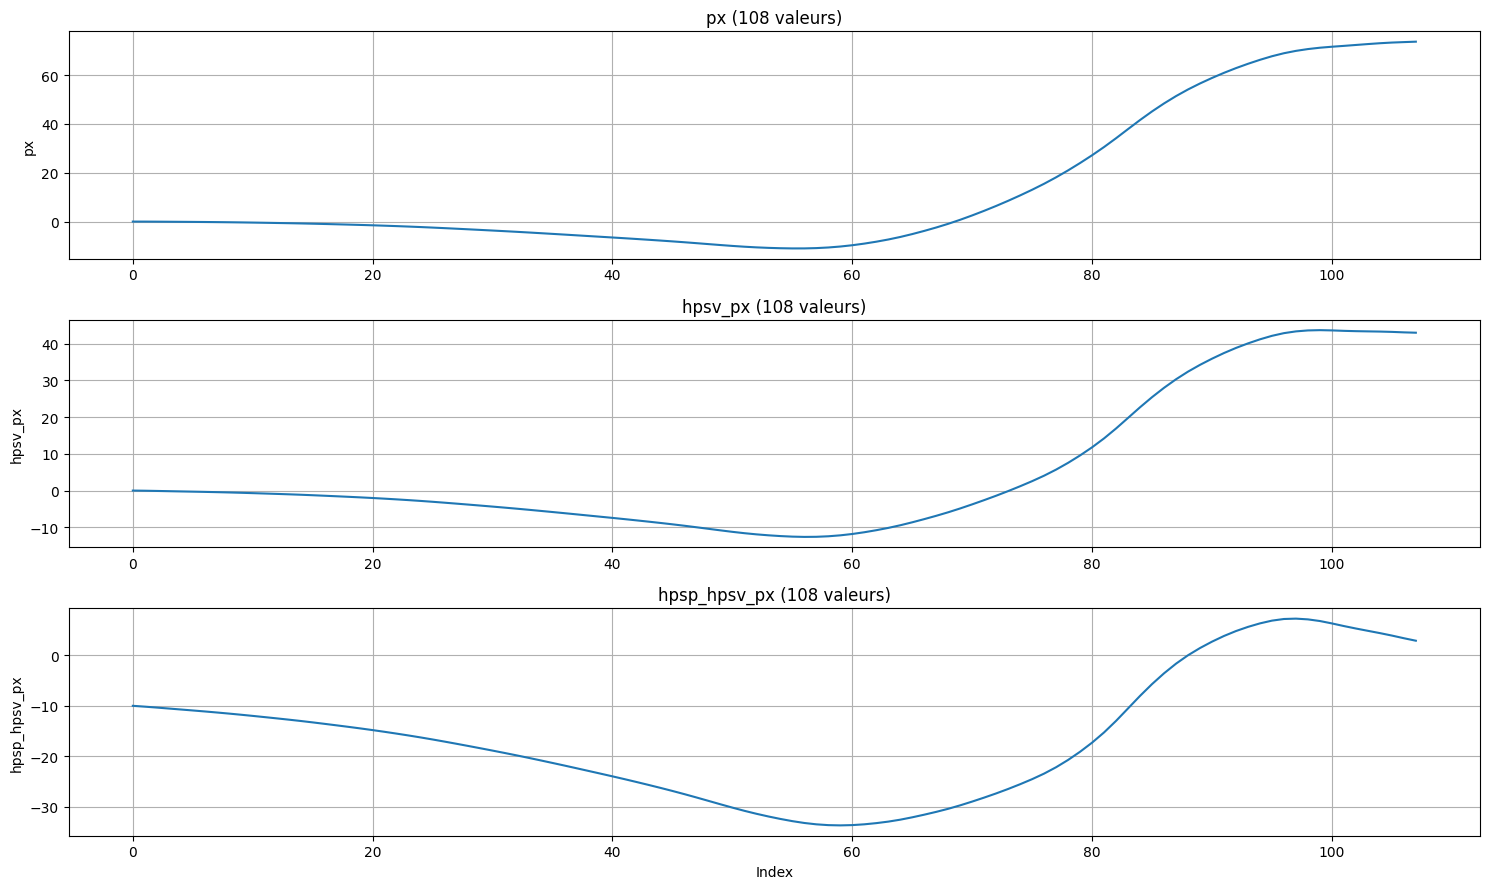

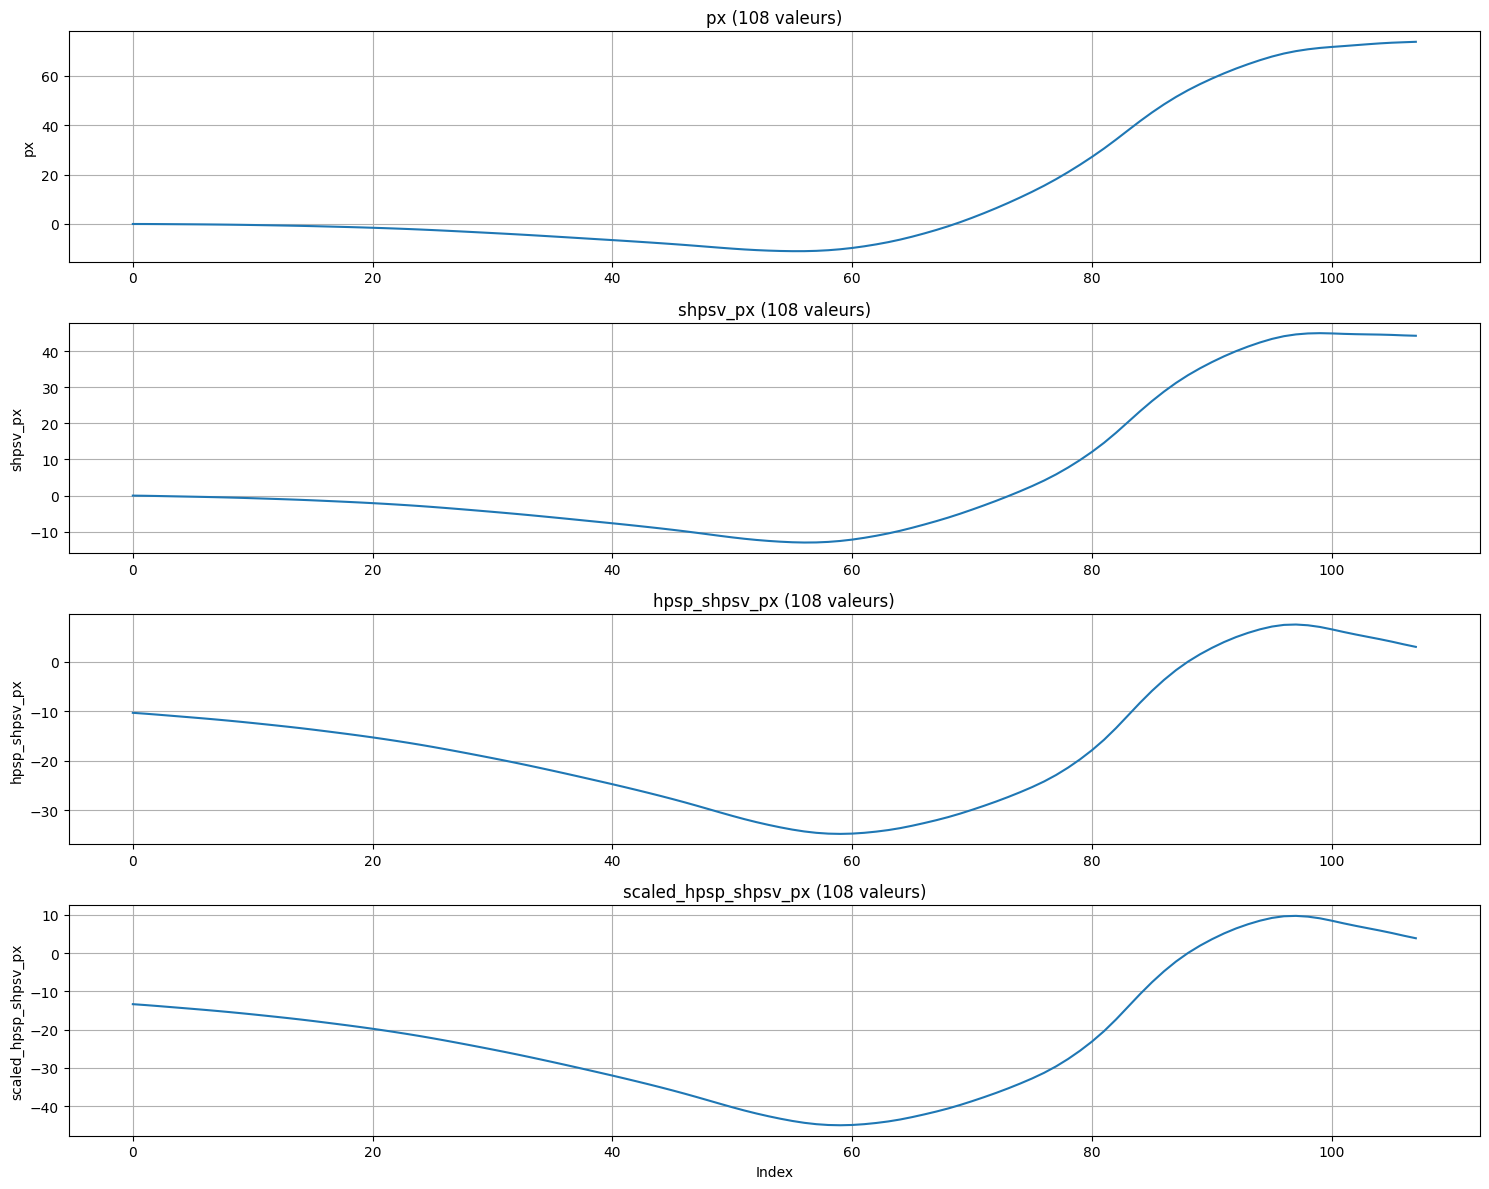

In [105]:
draw_data3(vx, hpiv_vx, shpiv_vy, label_x='lin_vx', label_y='hpiv_vx', label_z='scaled_hpiv_vx')
draw_data3(vx, hpsv_vx, shpsv_vy, label_x='lin_vx', label_y='hpsv_vx', label_z='scaled_hpsv_vx')
draw_data3(px, hpiv_px, hpip_hpiv_px, label_x='px', label_y='hpiv_px', label_z='hpip_hpiv_px')
draw_data4(px, shpiv_px, hpip_shpiv_px, shpip_shpiv_px, label_w='px', label_x='shpiv_px', label_y='hpip_shpiv_px', label_z='scaled_hpip_shpiv_px')
draw_data3(px, hpsv_px, hpsp_hpsv_px, label_x='px', label_y='hpsv_px', label_z='hpsp_hpsv_px')
draw_data4(px, shpsv_px, hpsp_shpsv_px, shpsp_shpsv_px, label_w='px', label_x='shpsv_px', label_y='hpsp_shpsv_px', label_z='scaled_hpsp_shpsv_px')

# 2D trajectory

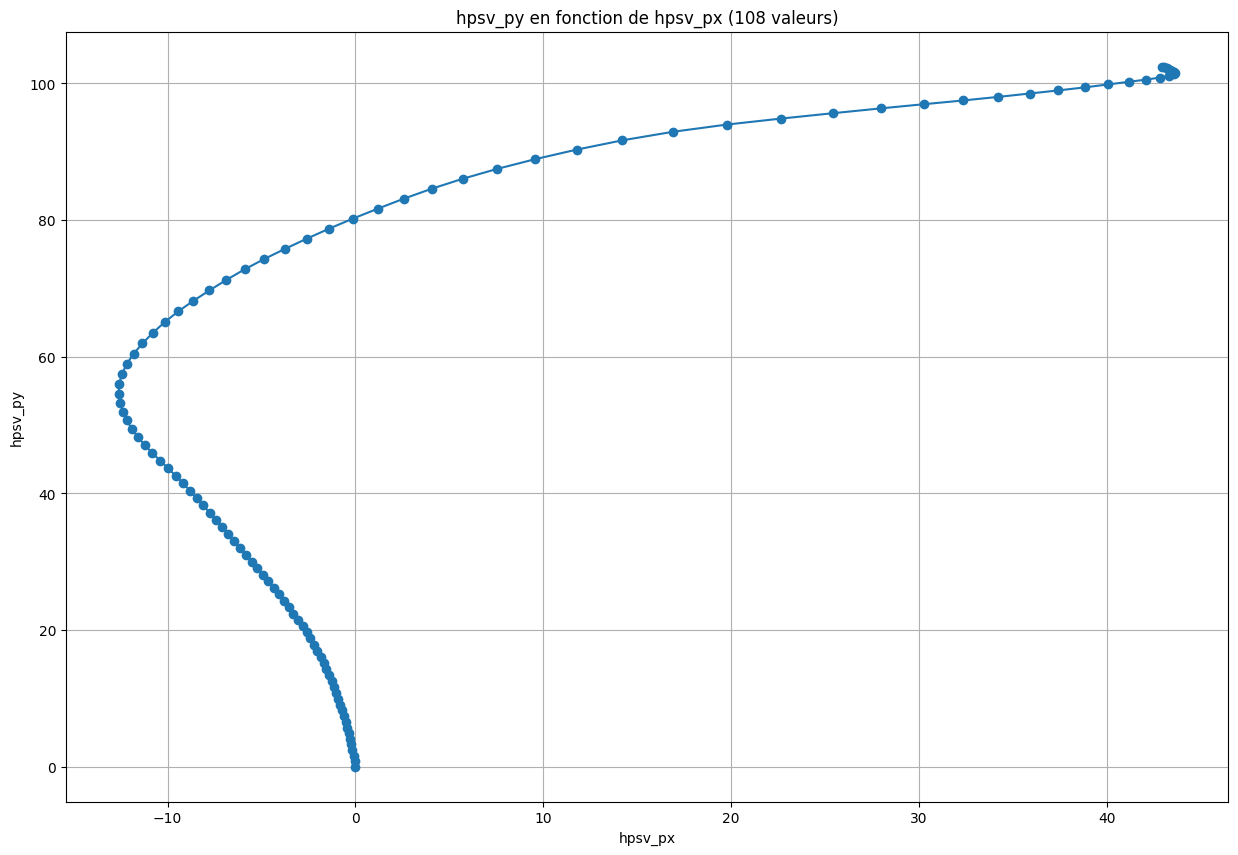

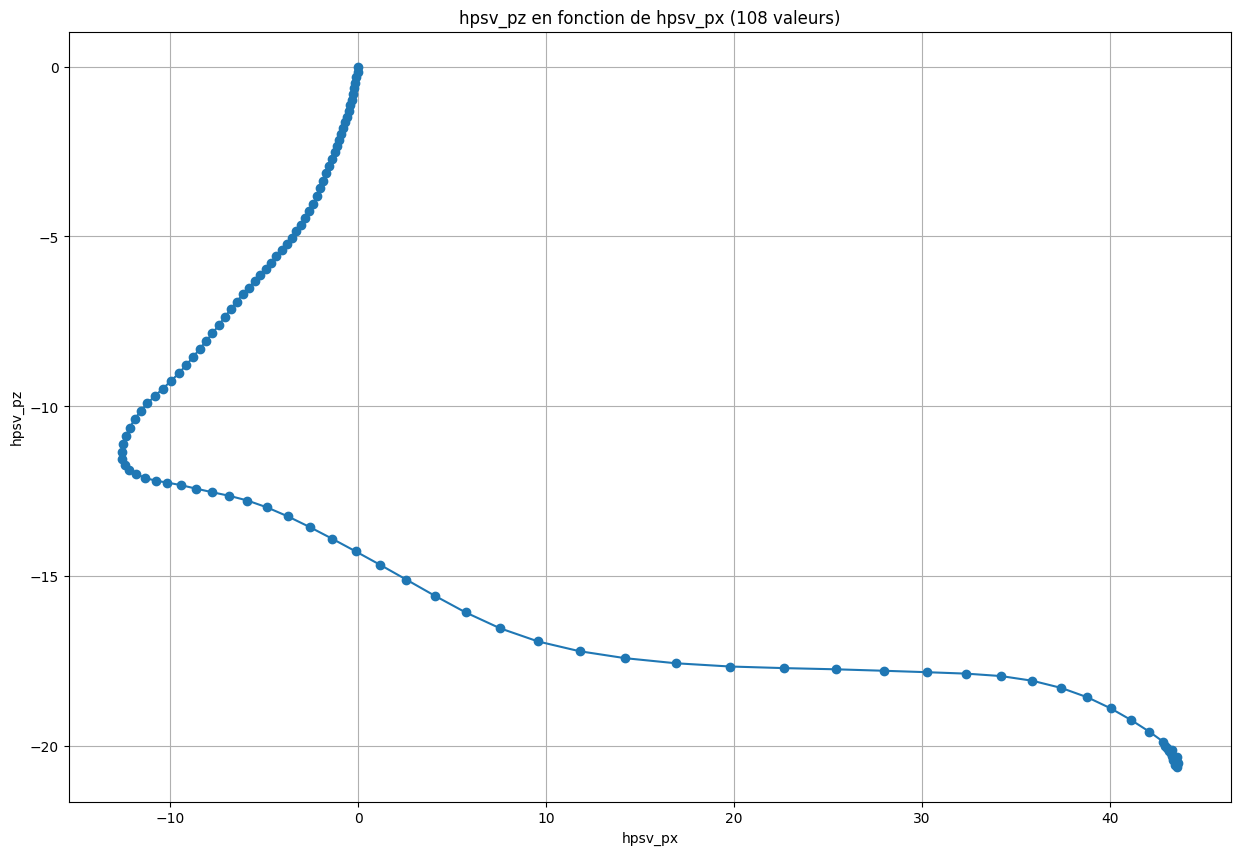

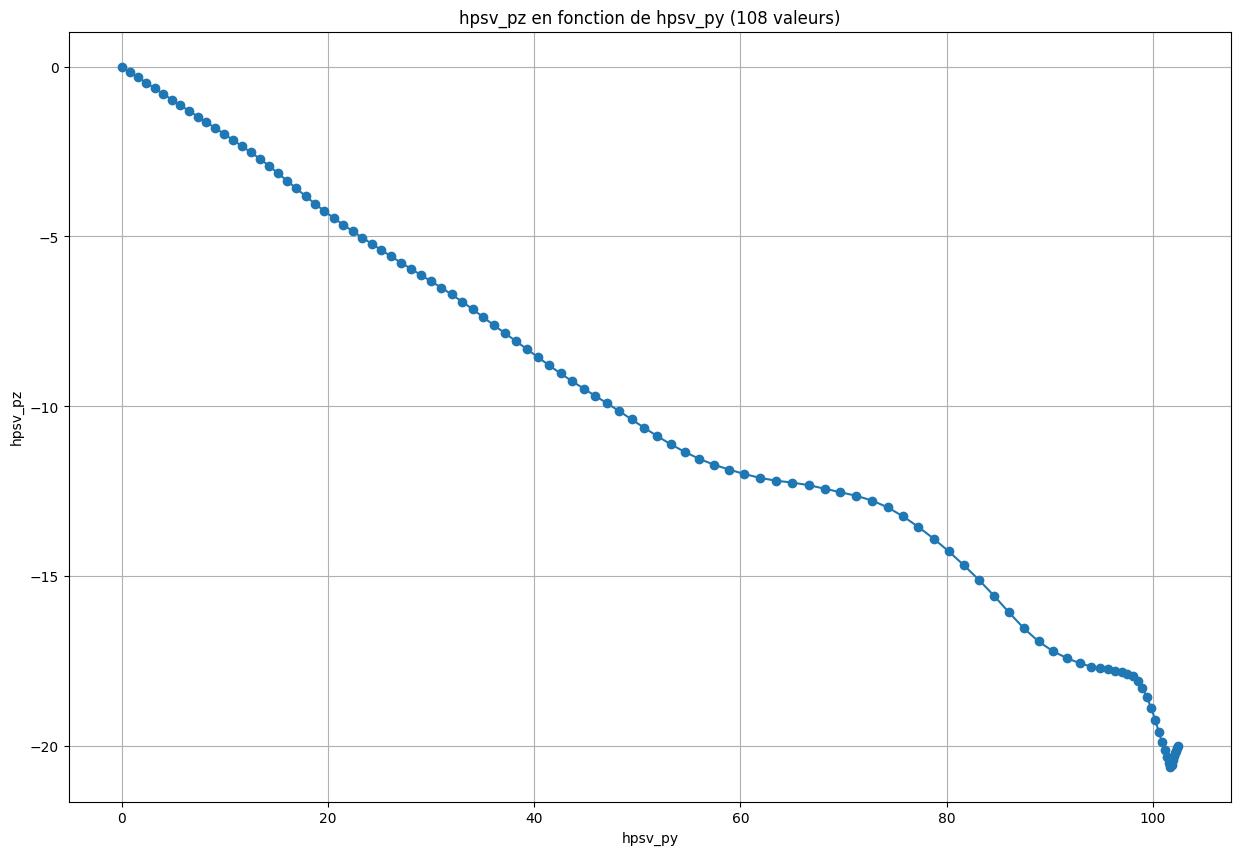

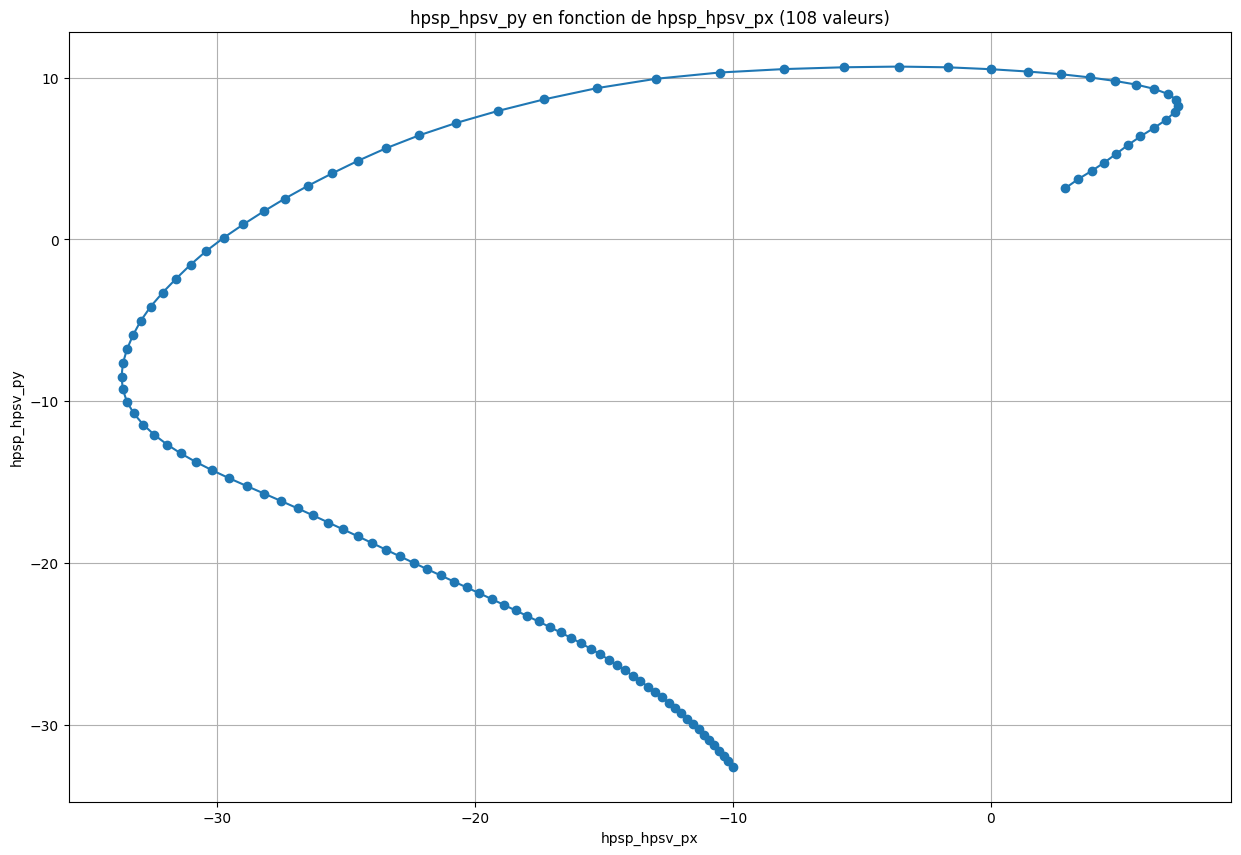

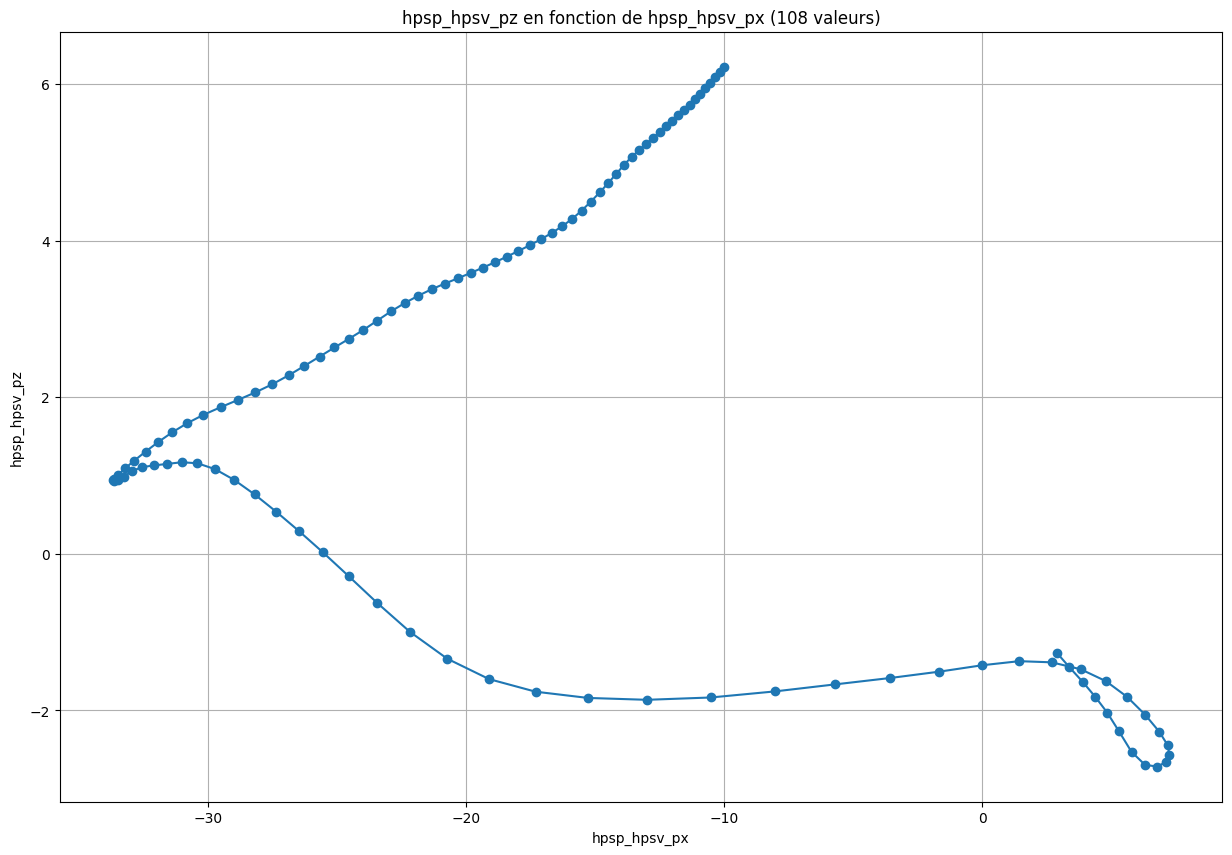

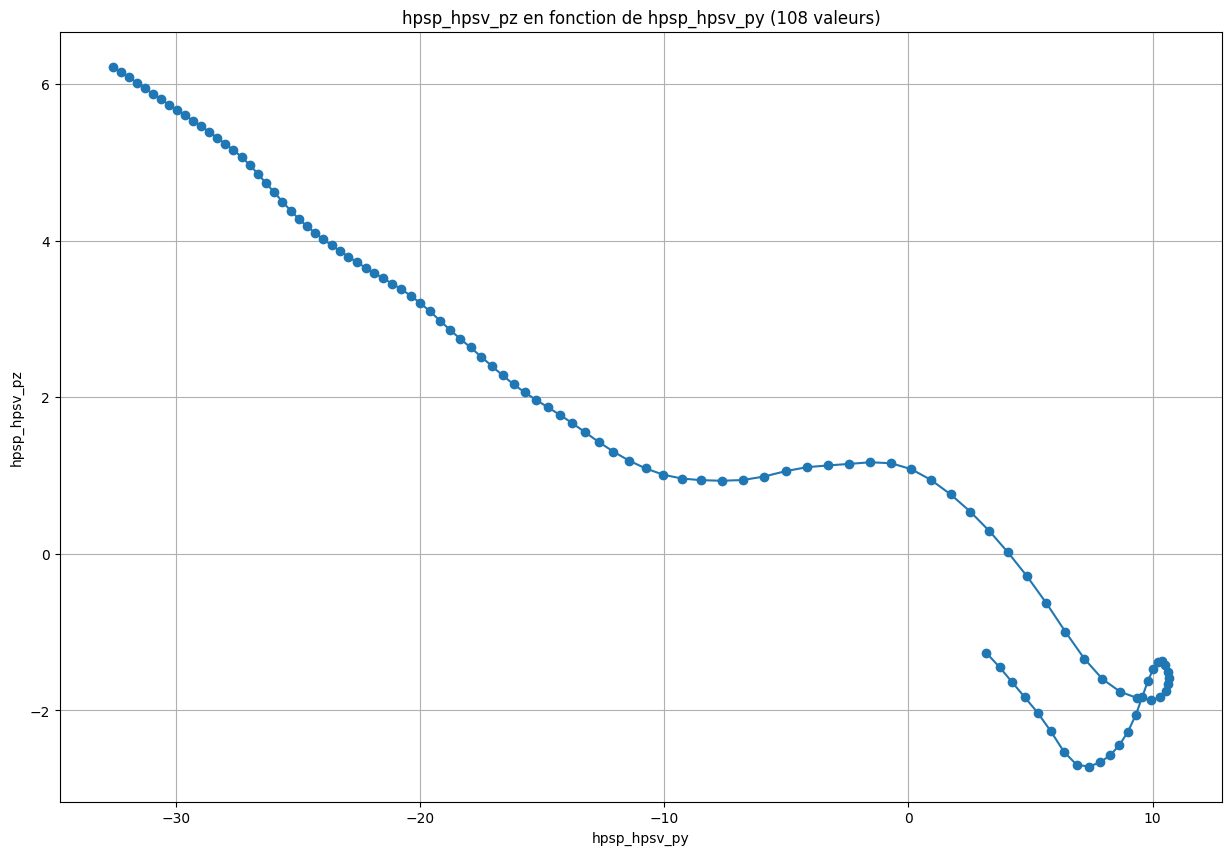

In [106]:
compare_data(hpsv_px, hpsv_py, xlabel='hpsv_px', ylabel='hpsv_py')
compare_data(hpsv_px, hpsv_pz, xlabel='hpsv_px', ylabel='hpsv_pz')
compare_data(hpsv_py, hpsv_pz, xlabel='hpsv_py', ylabel='hpsv_pz')
compare_data(hpsp_hpsv_px, hpsp_hpsv_py, xlabel='hpsp_hpsv_px', ylabel='hpsp_hpsv_py')
compare_data(hpsp_hpsv_px, hpsp_hpsv_pz, xlabel='hpsp_hpsv_px', ylabel='hpsp_hpsv_pz')
compare_data(hpsp_hpsv_py, hpsp_hpsv_pz, xlabel='hpsp_hpsv_py', ylabel='hpsp_hpsv_pz')
